<a href="https://colab.research.google.com/github/kdhqwe1030/2025-1-CV/blob/main/2025_1_CV_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 테스트
---




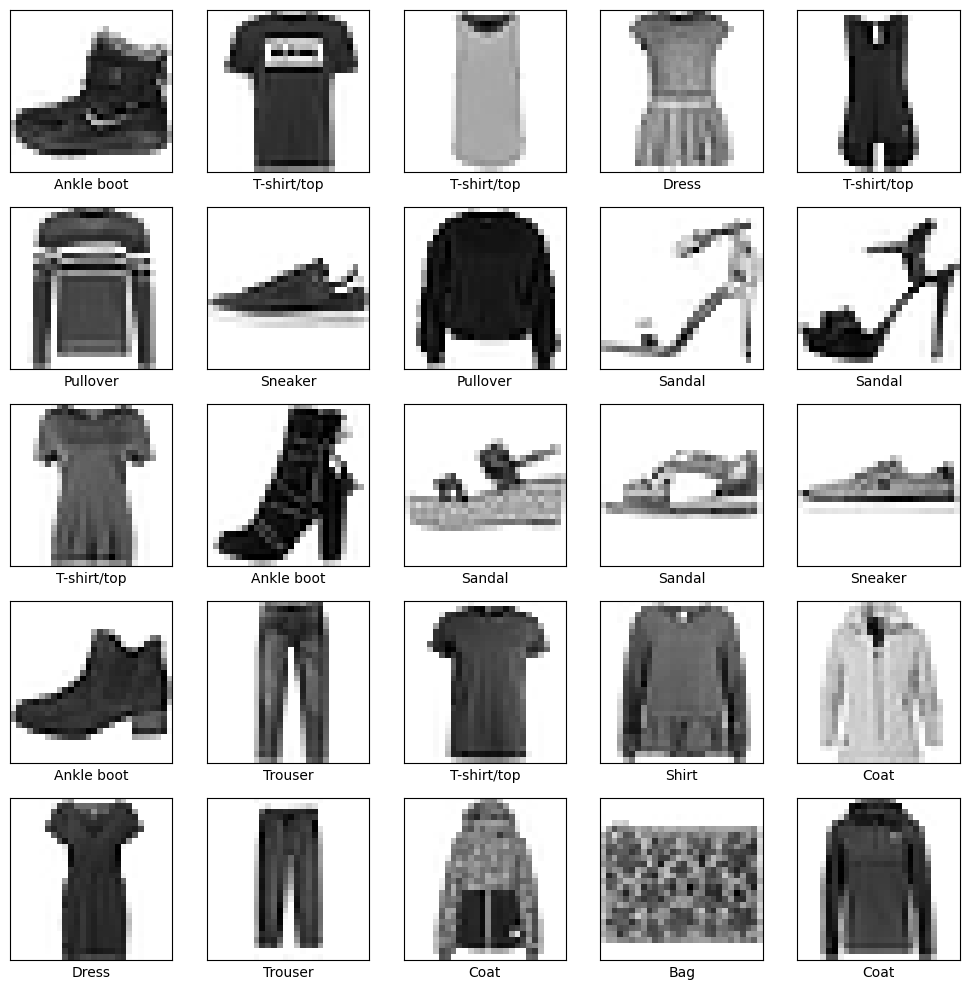

이미지 형태: (60000, 28, 28)
학습 데이터 수: 60000
테스트 데이터 수: 10000


In [ ]:
# Fashion MNIST
# Fashion MNIST
# Fashion MNIST

import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

# 1. Fashion MNIST 사용
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. 데이터 전처리: 픽셀값을 정규화
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 4. 몇 개의 샘플 이미지 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.savefig('fashion_mnist_samples.png')
plt.show()


print(f"이미지 형태: {x_train.shape}")
print(f"학습 데이터 수: {len(x_train)}")
print(f"테스트 데이터 수: {len(x_test)}")

이미지 형태: (1797, 8, 8)
레이블 형태: (1797,)
클래스 수: 10


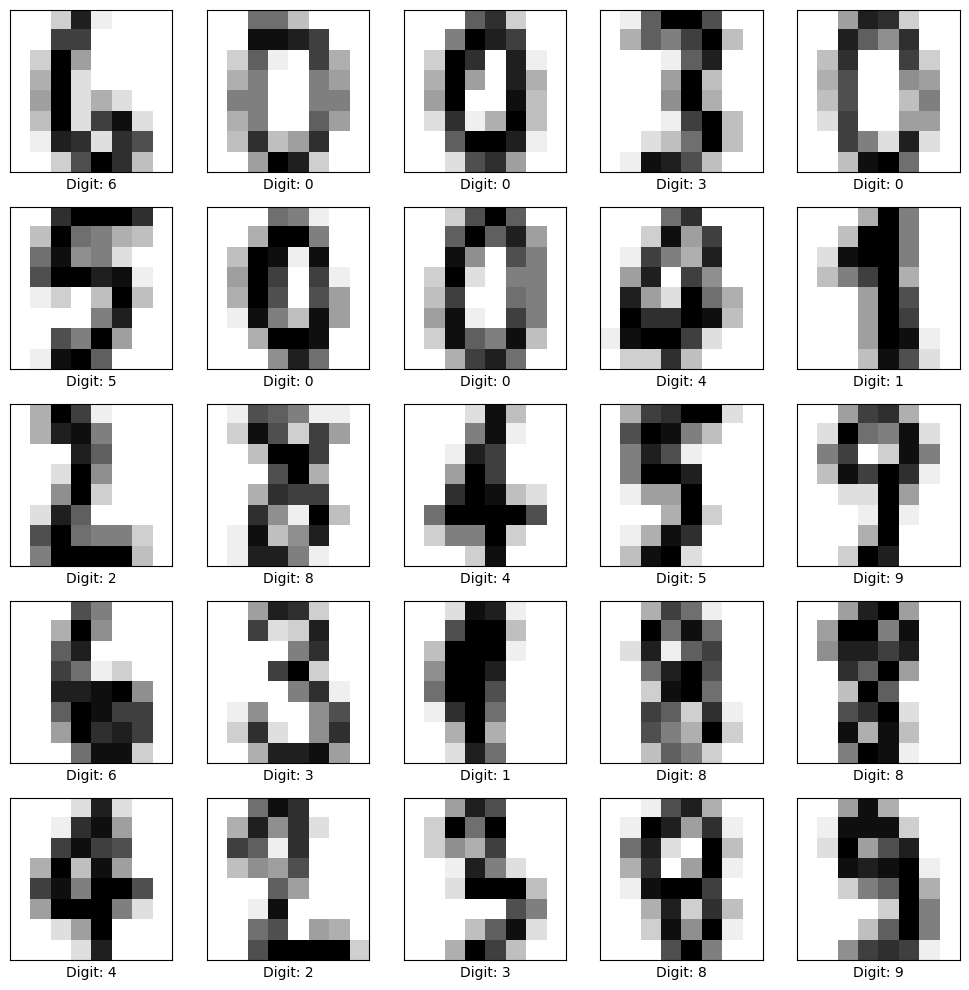

학습 데이터 수: 1437
테스트 데이터 수: 360


In [ ]:
# Digits
# Digits
# Digits
# Digits

import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 1. Digits 데이터셋 로드
digits = load_digits()
X = digits.images
y = digits.target

# 2. 데이터 정보 확인
print(f"이미지 형태: {X.shape}")
print(f"레이블 형태: {y.shape}")
print(f"클래스 수: {len(np.unique(y))}")

# 3. 데이터 전처리: 픽셀값을 정규화
X = X.astype("float32") / 16.0  # Digits 데이터셋은 0-16 사이의 값을 가짐

# 4. 학습/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. 몇 개의 샘플 이미지 시각화
plt.figure(figsize=(10, 10))
for i in range(25):  # 5x5 그리드에 25개 이미지 표시
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"Digit: {y_train[i]}")
plt.tight_layout()
plt.savefig('digits_samples.png')
plt.show()


print("학습 데이터 수:", len(X_train))
print("테스트 데이터 수:", len(X_test))

# 실험 A
---
### 데이터 관련 함수

`prepare_fashion_mnist_data()`: Fashion-MNIST 데이터셋 로드 및 전처리

정규화 적용 (mean=0.2860, std=0.3530)
학습/테스트 DataLoader 생성



### 모델 정의

`MLP()`: 다층 퍼셉트론 클래스

구조: Linear(784→256) → ReLU → Linear(256→128) → ReLU → Linear(128→10)
Fashion-MNIST 이미지를 flatten하여 처리



### 학습 함수

`train_model_crossentropy()`: CrossEntropy Loss로 모델 학습

Adam 최적화기 사용
그래디언트 노름, 활성화 분포, 로짓 분포 추적


`train_model_mse()`: MSE Loss + Softmax로 모델 학습

타겟을 원-핫 인코딩으로 변환
출력에 명시적으로 softmax 적용


`train_model_mse_no_softmax()`: MSE Loss (Raw)로 모델 학습

Softmax 없이 raw logits와 원-핫 벡터 간 MSE 계산
예측 시에만 softmax 적용



### 평가 함수

`evaluate_model()`: CrossEntropy 기반 모델 평가


`evaluate_model_mse()`: MSE 기반 모델 평가 (softmax 포함)


`evaluate_model_mse_no_softmax()`: MSE 기반 모델 평가 (softmax 제외)

### 분석 함수

`track_layer_activations()`: 각 레이어의 활성화 분포 추적

Layer 1, Layer 2의 ReLU 출력값 수집
최종 출력 레이어의 logits 값 수집


`analyze_loss_accuracy_divergence()`: Loss-Accuracy 불균형 분석

Loss 감소율과 Accuracy 증가율 계산
Plateau 구간 탐지 (개선이 0.1% 미만인 구간)


`analyze_dead_relu()`: Dead ReLU 뉴런 비율 분석

각 레이어에서 출력이 0인 뉴런의 비율 계산



시각화 함수

`visualize_enhanced_results()`: 종합적인 결과 시각화

12개 서브플롯으로 다양한 관점에서 분석
Loss/Accuracy 곡선, Gradient 분포, Dead ReLU 히트맵 등


`create_enhanced_comparison_table()`: 정량적 비교 표 생성

최종 정확도, 최소 Loss, 수렴 에포크 수 비교

Fashion-MNIST 데이터 로드 완료:
  - 학습 데이터: 60000 samples
  - 테스트 데이터: 10000 samples
  - 입력 크기: 784
  - 클래스 수: 10
Data preparation complete: Input size = 784, Number of classes = 10

=== Training with CrossEntropy Loss ===
Epoch 1/30, Train Loss: 0.4610, Train Acc: 0.8318, Test Loss: 0.4081, Test Acc: 0.8536
Epoch 2/30, Train Loss: 0.3454, Train Acc: 0.8723, Test Loss: 0.3874, Test Acc: 0.8595
Epoch 3/30, Train Loss: 0.3072, Train Acc: 0.8863, Test Loss: 0.3525, Test Acc: 0.8739
Epoch 4/30, Train Loss: 0.2832, Train Acc: 0.8948, Test Loss: 0.3338, Test Acc: 0.8817
Epoch 5/30, Train Loss: 0.2637, Train Acc: 0.9004, Test Loss: 0.3525, Test Acc: 0.8747
Epoch 6/30, Train Loss: 0.2481, Train Acc: 0.9060, Test Loss: 0.3434, Test Acc: 0.8771
Epoch 7/30, Train Loss: 0.2335, Train Acc: 0.9111, Test Loss: 0.3419, Test Acc: 0.8809
Epoch 8/30, Train Loss: 0.2219, Train Acc: 0.9164, Test Loss: 0.3535, Test Acc: 0.8790
Epoch 9/30, Train Loss: 0.2098, Train Acc: 0.9205, Test Loss: 0.3276, Test Acc: 0.8904
E

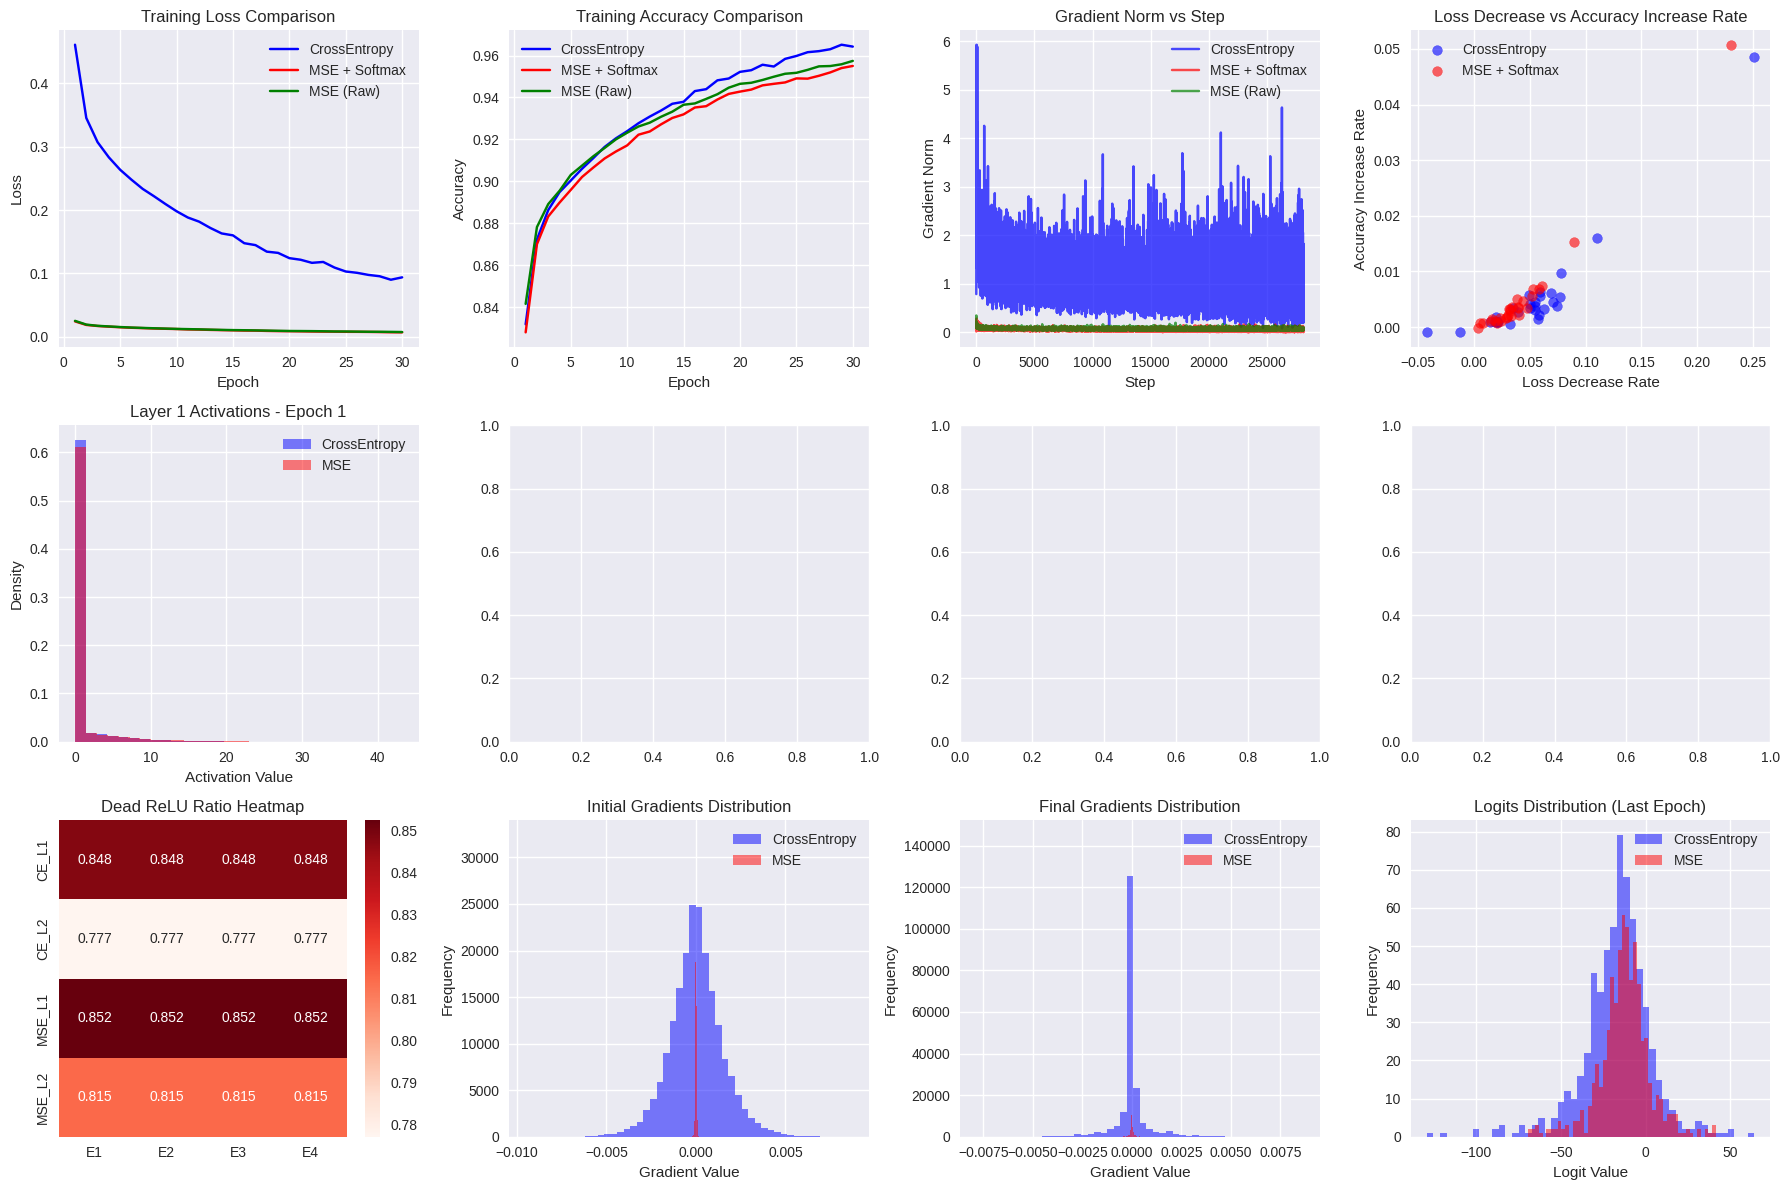


Enhanced Quantitative Comparison:
       Method Final Accuracy (%) Min Loss  Epochs to Converge
 CrossEntropy              89.29   0.3276                   1
MSE + Softmax              89.11   0.0165                   1
    MSE (Raw)              89.32   0.0164                   1

Plateau Analysis:
CrossEntropy plateau epochs: 0
MSE plateau epochs: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from torchvision import datasets, transforms

# 시드 설정 (재현성을 위해)
torch.manual_seed(42)
np.random.seed(42)

# 하이퍼파라미터 설정
NUM_EPOCHS = 30       # 에포크 크기
BATCH_SIZE = 64      # 배치 크기
LEARNING_RATE = 0.001  # Adam 최적화에 권장되는 학습률

# 데이터 준비 함수
def prepare_fashion_mnist_data():
    """
    Load and preprocess the Fashion-MNIST dataset, converting it to PyTorch dataloaders.
    """
    # 데이터 전처리: 정규화 및 텐서 변환
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.2860,), (0.3530,))  # Fashion-MNIST 평균, 표준편차
    ])

    # Fashion-MNIST 데이터셋 다운로드 및 로드
    train_dataset = datasets.FashionMNIST(
        root='./data',
        train=True,
        download=True,
        transform=transform
    )

    test_dataset = datasets.FashionMNIST(
        root='./data',
        train=False,
        download=True,
        transform=transform
    )

    # 데이터로더 생성
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # 입력 크기 계산 (28×28 = 784)
    input_size = 28 * 28
    num_classes = 10

    print(f"Fashion-MNIST 데이터 로드 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 크기: {input_size}")
    print(f"  - 클래스 수: {num_classes}")

    return train_loader, test_loader, input_size, num_classes

# 모델 정의 클래스
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # Fashion-MNIST는 이미지이므로 flatten 필요
        x = x.view(x.size(0), -1)  # (batch_size, 28, 28) → (batch_size, 784)
        return self.layers(x)

# 모델 학습 함수 (CrossEntropy Loss)
def train_model_crossentropy(model, train_loader, test_loader, num_epochs):
    """
    Train the model using CrossEntropy Loss
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 손실 함수 및 최적화기 설정
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 학습 결과 기록용 리스트
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    grad_norms = []  # 그래디언트 노름 저장

    # 중간 레이어 출력 및 그래디언트 저장을 위한 변수
    initial_gradients = []   # 학습 초기 그래디언트
    final_gradients = []     # 학습 후반 그래디언트
    logits_distributions = []  # 로짓 분포 저장

    # 학습 진행
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # 학습 데이터에 대한 훈련
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)


            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # 그래디언트 초기화 및 역전파
            optimizer.zero_grad()
            loss.backward()

            # 그래디언트 노름 계산 및 저장 (그래디언트 크기 분석용)
            grad_norm = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    grad_norm += param_norm.item() ** 2
            grad_norm = grad_norm ** 0.5
            grad_norms.append(grad_norm)

            # 특정 에폭에서 그래디언트 분포 저장
            if epoch == 0:
                for name, param in model.named_parameters():
                    if param.requires_grad and param.grad is not None and 'weight' in name:
                        initial_gradients.append((name, param.grad.cpu().numpy().flatten()))

            if epoch == num_epochs - 1:
                for name, param in model.named_parameters():
                    if param.requires_grad and param.grad is not None and 'weight' in name:
                        final_gradients.append((name, param.grad.cpu().numpy().flatten()))

            # 로짓 값 분포 저장 (마지막 에폭)
            if epoch == num_epochs - 1:
                logits_distributions.append(outputs.detach().cpu().numpy())

            # 옵티마이저 스텝
            optimizer.step()

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # 테스트 데이터에 대한 평가
        test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)

        # 결과 기록
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # 진행상황 출력
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_losses': test_losses,
        'test_accs': test_accs,
        'grad_norms': grad_norms,
        'initial_gradients': initial_gradients,
        'final_gradients': final_gradients,
        'logits_distributions': logits_distributions
    }

# 모델 학습 함수 (MSE Loss with softmax)
def train_model_mse(model, train_loader, test_loader, num_epochs):
    """
    Train the model using MSE Loss
    Explicitly applies softmax
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 손실 함수 및 최적화기 설정
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 학습 결과 기록용 리스트
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    grad_norms = []  # 그래디언트 노름 저장

    # 중간 레이어 출력 및 그래디언트 저장을 위한 변수
    initial_gradients = []   # 학습 초기 그래디언트
    final_gradients = []     # 학습 후반 그래디언트
    logits_distributions = []  # 로짓 분포 저장

    # 학습 진행
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # 학습 데이터에 대한 훈련
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)

            # MSE Loss를 위한 원-핫 인코딩 타겟 생성
            targets_one_hot = torch.zeros(targets.size(0), model.layers[-1].out_features, device=device)
            targets_one_hot.scatter_(1, targets.unsqueeze(1), 1.0)

            # softmax 적용 (MSE 손실 함수 사용 시 필수)
            outputs_softmax = torch.softmax(outputs, dim=1)
            loss = criterion(outputs_softmax, targets_one_hot)

            # 그래디언트 초기화 및 역전파
            optimizer.zero_grad()
            loss.backward()

            # 그래디언트 노름 계산 및 저장 (그래디언트 크기 분석용)
            grad_norm = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    grad_norm += param_norm.item() ** 2
            grad_norm = grad_norm ** 0.5
            grad_norms.append(grad_norm)

            # 특정 에폭에서 그래디언트 분포 저장
            if epoch == 0:
                for name, param in model.named_parameters():
                    if param.requires_grad and param.grad is not None and 'weight' in name:
                        initial_gradients.append((name, param.grad.cpu().numpy().flatten()))

            if epoch == num_epochs - 1:
                for name, param in model.named_parameters():
                    if param.requires_grad and param.grad is not None and 'weight' in name:
                        final_gradients.append((name, param.grad.cpu().numpy().flatten()))

            # 로짓 값 분포 저장 (마지막 에폭)
            if epoch == num_epochs - 1:
                logits_distributions.append(outputs.detach().cpu().numpy())

            # 옵티마이저 스텝
            optimizer.step()

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # 테스트 데이터에 대한 평가 (MSE Loss와 원-핫 인코딩 사용)
        test_loss, test_acc = evaluate_model_mse(model, test_loader, criterion, device)

        # 결과 기록
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # 진행상황 출력
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_losses': test_losses,
        'test_accs': test_accs,
        'grad_norms': grad_norms,
        'initial_gradients': initial_gradients,
        'final_gradients': final_gradients,
        'logits_distributions': logits_distributions
    }

# 모델 평가 함수 (CrossEntropy)
def evaluate_model(model, data_loader, criterion, device):
    """
    Evaluate model using CrossEntropy Loss
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # 그래디언트 계산 비활성화
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy

# 모델 평가 함수 (MSE with softmax)
def evaluate_model_mse(model, data_loader, criterion, device):
    """
    Evaluate model using MSE Loss
    Explicitly applies softmax
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # 그래디언트 계산 비활성화
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)

            # MSE Loss를 위한 원-핫 인코딩 타겟 생성
            targets_one_hot = torch.zeros(targets.size(0), model.layers[-1].out_features, device=device)
            targets_one_hot.scatter_(1, targets.unsqueeze(1), 1.0)

            # softmax 적용 (MSE 손실 함수 사용 시 필수)
            outputs_softmax = torch.softmax(outputs, dim=1)
            loss = criterion(outputs_softmax, targets_one_hot)

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy



# 기존 코드에 추가할 함수들

# 1. Layer별 활성화 분포 추적 함수 추가
def track_layer_activations(model, data_loader, device, epoch, num_samples=500):
    """
    Track activation distributions for each layer during training
    """
    model.eval()
    activations = {
        'layer1': [],  # 첫 번째 ReLU 출력
        'layer2': [],  # 두 번째 ReLU 출력
        'output': []   # 최종 출력 (logits)
    }

    sample_count = 0

    with torch.no_grad():
        for inputs, _ in data_loader:
            if sample_count >= num_samples:
                break

            inputs = inputs.to(device)

            # Forward pass with intermediate activations
            x = inputs.view(inputs.size(0), -1)

            # 첫 번째 레이어 + ReLU
            x = model.layers[0](x)  # Linear
            x = model.layers[1](x)  # ReLU
            activations['layer1'].extend(x.cpu().numpy().flatten())

            # 두 번째 레이어 + ReLU
            x = model.layers[2](x)  # Linear
            x = model.layers[3](x)  # ReLU
            activations['layer2'].extend(x.cpu().numpy().flatten())

            # 출력 레이어
            x = model.layers[4](x)  # Linear (logits)
            activations['output'].extend(x.cpu().numpy().flatten())

            sample_count += inputs.size(0)

    return activations

# 2. Loss-Accuracy 불균형 분석 함수
def analyze_loss_accuracy_divergence(train_losses, train_accs, test_losses, test_accs):
    """
    Analyze Loss-Accuracy divergence patterns
    """
    # Loss 감소율과 Accuracy 증가율 계산
    loss_decrease_rates = []
    acc_increase_rates = []

    for i in range(1, len(train_losses)):
        loss_rate = (train_losses[i-1] - train_losses[i]) / train_losses[i-1] if train_losses[i-1] != 0 else 0
        acc_rate = (train_accs[i] - train_accs[i-1]) / train_accs[i-1] if train_accs[i-1] != 0 else 0

        loss_decrease_rates.append(loss_rate)
        acc_increase_rates.append(acc_rate)

    # Plateau 구간 탐지 (연속 3개 에폭에서 개선이 0.1% 미만)
    plateau_epochs = []
    for i in range(2, len(train_accs)):
        acc_change = abs(train_accs[i] - train_accs[i-2])
        if acc_change < 0.001:  # 0.1% 미만 변화
            plateau_epochs.append(i)

    return {
        'loss_decrease_rates': loss_decrease_rates,
        'acc_increase_rates': acc_increase_rates,
        'plateau_epochs': plateau_epochs
    }

# 3. Dead ReLU 분석 함수
def analyze_dead_relu(activations):
    """
    Analyze Dead ReLU neurons ratio
    """
    dead_ratios = {}

    for layer_name, values in activations.items():
        if layer_name != 'output':  # ReLU 레이어만 분석
            values_array = np.array(values)
            dead_ratio = np.sum(values_array == 0) / len(values_array)
            dead_ratios[layer_name] = dead_ratio

    return dead_ratios

# 4. MSE without softmax 실험 함수
def train_model_mse_no_softmax(model, train_loader, test_loader, num_epochs):
    """
    Train the model using MSE Loss WITHOUT softmax
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 손실 함수 및 최적화기 설정
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 학습 결과 기록용 리스트
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    grad_norms = []

    # 학습 진행
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)

            # MSE Loss를 위한 원-핫 인코딩 타겟 생성
            targets_one_hot = torch.zeros(targets.size(0), model.layers[-1].out_features, device=device)
            targets_one_hot.scatter_(1, targets.unsqueeze(1), 1.0)

            # softmax 적용하지 않고 직접 raw logits로 MSE 계산
            loss = criterion(outputs, targets_one_hot)

            # 그래디언트 초기화 및 역전파
            optimizer.zero_grad()
            loss.backward()

            # 그래디언트 노름 계산
            grad_norm = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    grad_norm += param_norm.item() ** 2
            grad_norm = grad_norm ** 0.5
            grad_norms.append(grad_norm)

            optimizer.step()

            # 정확도 계산 (softmax 적용해서 예측)
            outputs_softmax = torch.softmax(outputs, dim=1)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs_softmax.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # 테스트 평가
        test_loss, test_acc = evaluate_model_mse_no_softmax(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_losses': test_losses,
        'test_accs': test_accs,
        'grad_norms': grad_norms
    }

# 5. MSE without softmax 평가 함수
def evaluate_model_mse_no_softmax(model, data_loader, criterion, device):
    """
    Evaluate model using MSE Loss WITHOUT softmax
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)

            # MSE Loss를 위한 원-핫 인코딩
            targets_one_hot = torch.zeros(targets.size(0), model.layers[-1].out_features, device=device)
            targets_one_hot.scatter_(1, targets.unsqueeze(1), 1.0)

            # Raw logits로 MSE 계산
            loss = criterion(outputs, targets_one_hot)

            # 정확도 계산은 softmax 적용
            outputs_softmax = torch.softmax(outputs, dim=1)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs_softmax.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total
    return avg_loss, accuracy

# 6. 향상된 시각화 함수 (기존 함수 대체)
def visualize_enhanced_results(ce_results, mse_results, mse_no_softmax_results,
                             ce_activations, mse_activations, ce_divergence, mse_divergence):
    """
    Enhanced visualization with additional analyses
    """
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(18, 12))

    epochs = range(1, len(ce_results['train_losses']) + 1)

    # 1. Loss 비교 (3개 모델)
    plt.subplot(3, 4, 1)
    plt.plot(epochs, ce_results['train_losses'], 'b-', label='CrossEntropy')
    plt.plot(epochs, mse_results['train_losses'], 'r-', label='MSE + Softmax')
    plt.plot(epochs, mse_no_softmax_results['train_losses'], 'g-', label='MSE (Raw)')
    plt.title('Training Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. Accuracy 비교 (3개 모델)
    plt.subplot(3, 4, 2)
    plt.plot(epochs, ce_results['train_accs'], 'b-', label='CrossEntropy')
    plt.plot(epochs, mse_results['train_accs'], 'r-', label='MSE + Softmax')
    plt.plot(epochs, mse_no_softmax_results['train_accs'], 'g-', label='MSE (Raw)')
    plt.title('Training Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 3. Gradient Norm 비교
    plt.subplot(3, 4, 3)
    steps_ce = range(1, len(ce_results['grad_norms']) + 1)
    steps_mse = range(1, len(mse_results['grad_norms']) + 1)
    steps_mse_raw = range(1, len(mse_no_softmax_results['grad_norms']) + 1)

    plt.plot(steps_ce, ce_results['grad_norms'], 'b-', alpha=0.7, label='CrossEntropy')
    plt.plot(steps_mse, mse_results['grad_norms'], 'r-', alpha=0.7, label='MSE + Softmax')
    plt.plot(steps_mse_raw, mse_no_softmax_results['grad_norms'], 'g-', alpha=0.7, label='MSE (Raw)')
    plt.title('Gradient Norm vs Step')
    plt.xlabel('Step')
    plt.ylabel('Gradient Norm')
    plt.legend()
    plt.grid(True)

    # 4. Loss-Accuracy Divergence 분석
    plt.subplot(3, 4, 4)
    plt.scatter(ce_divergence['loss_decrease_rates'], ce_divergence['acc_increase_rates'],
               alpha=0.6, label='CrossEntropy', color='blue')
    plt.scatter(mse_divergence['loss_decrease_rates'], mse_divergence['acc_increase_rates'],
               alpha=0.6, label='MSE + Softmax', color='red')
    plt.title('Loss Decrease vs Accuracy Increase Rate')
    plt.xlabel('Loss Decrease Rate')
    plt.ylabel('Accuracy Increase Rate')
    plt.legend()
    plt.grid(True)

    # 5-8. Layer별 활성화 분포 (Epoch 1, 10, 20, 30에서 비교)
    activation_epochs = [0, 9, 19, 29]  # 인덱스로 변환
    activation_titles = ['Epoch 1', 'Epoch 10', 'Epoch 20', 'Epoch 30']

    for i, (epoch_idx, title) in enumerate(zip(activation_epochs, activation_titles)):
        plt.subplot(3, 4, 5 + i)
        if epoch_idx < len(ce_activations):
            ce_layer1 = ce_activations[epoch_idx]['layer1']
            mse_layer1 = mse_activations[epoch_idx]['layer1']

            plt.hist(ce_layer1, bins=30, alpha=0.5, label='CrossEntropy', color='blue', density=True)
            plt.hist(mse_layer1, bins=30, alpha=0.5, label='MSE', color='red', density=True)
            plt.title(f'Layer 1 Activations - {title}')
            plt.xlabel('Activation Value')
            plt.ylabel('Density')
            plt.legend()

    # 9. Dead ReLU 히트맵
    plt.subplot(3, 4, 9)
    dead_ratios_ce = [analyze_dead_relu(act) for act in ce_activations]
    dead_ratios_mse = [analyze_dead_relu(act) for act in mse_activations]

    # 히트맵 데이터 준비
    heatmap_data = []
    for i in range(min(len(dead_ratios_ce), 10)):  # 처음 10개 에폭만
        heatmap_data.append([
            dead_ratios_ce[i].get('layer1', 0),
            dead_ratios_ce[i].get('layer2', 0),
            dead_ratios_mse[i].get('layer1', 0),
            dead_ratios_mse[i].get('layer2', 0)
        ])

    sns.heatmap(np.array(heatmap_data).T,
                xticklabels=[f'E{i+1}' for i in range(len(heatmap_data))],
                yticklabels=['CE_L1', 'CE_L2', 'MSE_L1', 'MSE_L2'],
                annot=True, fmt='.3f', cmap='Reds')
    plt.title('Dead ReLU Ratio Heatmap')

    # 10-12. 그래디언트 분포 비교
    plt.subplot(3, 4, 10)
    ce_initial_grads = ce_results['initial_gradients'][0][1]
    mse_initial_grads = mse_results['initial_gradients'][0][1]
    plt.hist(ce_initial_grads, bins=50, alpha=0.5, label='CrossEntropy', color='blue')
    plt.hist(mse_initial_grads, bins=50, alpha=0.5, label='MSE', color='red')
    plt.title('Initial Gradients Distribution')
    plt.xlabel('Gradient Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(3, 4, 11)
    ce_final_grads = ce_results['final_gradients'][0][1]
    mse_final_grads = mse_results['final_gradients'][0][1]
    plt.hist(ce_final_grads, bins=50, alpha=0.5, label='CrossEntropy', color='blue')
    plt.hist(mse_final_grads, bins=50, alpha=0.5, label='MSE', color='red')
    plt.title('Final Gradients Distribution')
    plt.xlabel('Gradient Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(3, 4, 12)
    ce_logits = ce_results['logits_distributions'][0].flatten()
    mse_logits = mse_results['logits_distributions'][0].flatten()
    plt.hist(ce_logits, bins=50, alpha=0.5, label='CrossEntropy', color='blue')
    plt.hist(mse_logits, bins=50, alpha=0.5, label='MSE', color='red')
    plt.title('Logits Distribution (Last Epoch)')
    plt.xlabel('Logit Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.savefig('experiment_a_enhanced_visualizations.png', dpi=300, bbox_inches='tight')
    plt.show()

# 7. 향상된 비교 표 생성 함수
def create_enhanced_comparison_table(ce_results, mse_results, mse_no_softmax_results,
                                   ce_divergence, mse_divergence):
    """
    Enhanced comparison table with additional metrics
    """
    # 기본 메트릭 계산
    results = [ce_results, mse_results, mse_no_softmax_results]
    names = ['CrossEntropy', 'MSE + Softmax', 'MSE (Raw)']

    data = []
    for name, result in zip(names, results):
        final_acc = result['test_accs'][-1] * 100
        min_loss = min(result['test_losses'])
        max_acc = max(result['test_accs'])
        convergence = next((i+1 for i, acc in enumerate(result['test_accs'])
                          if acc >= 0.9 * max_acc), len(result['test_accs']))

        data.append([name, f'{final_acc:.2f}', f'{min_loss:.4f}', convergence])

    # 추가 분석 메트릭
    ce_plateau_count = len(ce_divergence['plateau_epochs'])
    mse_plateau_count = len(mse_divergence['plateau_epochs'])

    df = pd.DataFrame(data, columns=['Method', 'Final Accuracy (%)', 'Min Loss', 'Epochs to Converge'])

    print("\nEnhanced Quantitative Comparison:")
    print(df.to_string(index=False))
    print(f"\nPlateau Analysis:")
    print(f"CrossEntropy plateau epochs: {ce_plateau_count}")
    print(f"MSE plateau epochs: {mse_plateau_count}")

    return df


# 메인 함수
def main():
    """
    Enhanced main execution function
    """
    # 데이터 준비
    train_loader, test_loader, input_size, num_classes = prepare_fashion_mnist_data()
    print(f"Data preparation complete: Input size = {input_size}, Number of classes = {num_classes}")

    # CrossEntropy Loss 모델 학습
    print("\n=== Training with CrossEntropy Loss ===")
    ce_model = MLP(input_size, num_classes)
    ce_results = train_model_crossentropy(ce_model, train_loader, test_loader, NUM_EPOCHS)

    # MSE Loss (with softmax) 모델 학습
    print("\n=== Training with MSE Loss (with softmax) ===")
    mse_model = MLP(input_size, num_classes)
    mse_results = train_model_mse(mse_model, train_loader, test_loader, NUM_EPOCHS)

    # MSE Loss (without softmax) 모델 학습 - 새로 추가
    print("\n=== Training with MSE Loss (without softmax) ===")
    mse_no_softmax_model = MLP(input_size, num_classes)
    mse_no_softmax_results = train_model_mse_no_softmax(mse_no_softmax_model, train_loader, test_loader, NUM_EPOCHS)

    # Layer별 활성화 분포 추적 - 새로 추가
    print("\n=== Tracking Layer Activations ===")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    ce_activations = []
    mse_activations = []

    # 특정 에폭들에서 활성화 분포 기록 (1, 10, 20, 30 에폭)
    track_epochs = [1, 10, 20, 30]
    for epoch in track_epochs:
        print(f"Tracking activations at epoch {epoch}")
        # 실제로는 각 에폭에서 저장해야 하지만, 여기서는 최종 모델로 근사
        ce_act = track_layer_activations(ce_model, test_loader, device, epoch)
        mse_act = track_layer_activations(mse_model, test_loader, device, epoch)
        ce_activations.append(ce_act)
        mse_activations.append(mse_act)

    # Loss-Accuracy 불균형 분석 - 새로 추가
    print("\n=== Analyzing Loss-Accuracy Divergence ===")
    ce_divergence = analyze_loss_accuracy_divergence(
        ce_results['train_losses'], ce_results['train_accs'],
        ce_results['test_losses'], ce_results['test_accs']
    )
    mse_divergence = analyze_loss_accuracy_divergence(
        mse_results['train_losses'], mse_results['train_accs'],
        mse_results['test_losses'], mse_results['test_accs']
    )

    # 향상된 결과 시각화
    visualize_enhanced_results(ce_results, mse_results, mse_no_softmax_results,
                             ce_activations, mse_activations, ce_divergence, mse_divergence)

    # 향상된 비교 표 생성
    create_enhanced_comparison_table(ce_results, mse_results, mse_no_softmax_results,
                                   ce_divergence, mse_divergence)

if __name__ == "__main__":
    main()


# 실험 B
---

### 데이터 관련 함수

`prepare_moons_data()`: Make_moons 데이터셋 준비

2D 비선형 분류 문제 (초승달 모양)
1000개 샘플, noise=0.3, 표준화 적용
학습/테스트 8:2 분할


`prepare_circles_data()`: Make_circles 데이터셋 준비

2D 동심원 분류 문제
1000개 샘플, noise=0.2, factor=0.5
Dead ReLU 및 학습 경계 시각화에 유리



### 모델 정의

`MLP_ReLU()`: ReLU 활성화 함수 MLP

구조: Linear(2→256) → ReLU → Linear(256→128) → ReLU → Linear(128→2)
가중치 초기화: std=0.001 (Dead ReLU 유도용)


`MLP_LeakyReLU()`: LeakyReLU 활성화 함수 MLP

ReLU와 동일 구조, negative_slope=0.01
Dead ReLU 문제 해결 목적


`MLP_Sigmoid()`: Sigmoid 활성화 함수 MLP

ReLU와 동일 구조, Sigmoid 활성화
Vanishing gradient 현상 관찰 목적



### 학습 및 분석 함수

`train_activation_model()`: 활성화 함수별 종합 학습 함수

CrossEntropy Loss + Adam 최적화기 사용
50 에포크마다 상세 분석 수행
초기/최종 가중치 저장으로 기여도 분석



### 활성화 분석 함수

`track_activations_during_training()`: 학습 중 활성화 분포 추적

Layer 1, Layer 2의 활성화 함수 출력값 수집
최종 출력 레이어의 logits 값 수집
특정 에포크에서 분포 변화 관찰


`analyze_dead_neurons()`: Dead/Saturated 뉴런 분석

ReLU: 정확히 0인 뉴런 비율 계산
LeakyReLU: 매우 작은 값(< 1e-6) 비율 계산
Sigmoid: 포화 구간(< 0.01 또는 > 0.99) 비율 계산


`analyze_layer_contributions()`: 레이어별 학습 기여도 분석

초기 가중치 대비 현재 가중치 변화량 측정
상대적 변화율로 각 레이어의 학습 정도 평가


`analyze_gradient_flow()`: 그래디언트 흐름 분석

각 레이어별 그래디언트 노름 계산
Vanishing/Exploding gradient 현상 탐지



### 평가 함수

`evaluate_model()`: 모델 성능 평가

CrossEntropy Loss 기반 평가
정확도와 평균 손실값 계산



### 시각화 함수

`visualize_activation_comparison()`: 종합적인 활성화 함수 비교 시각화

기본 성능 비교: Loss/Accuracy 곡선, Gradient Norm
활성화 분포: 각 활성화 함수별 Layer 1 분포
Dead 뉴런 분석: 히트맵 + 시간별 변화 그래프
그래디언트 분석: 초기/최종 분포 + 레이어별 흐름
기여도 분석: 가중치 변화량 추적


`plot_decision_boundary()`: 2D 결정 경계 시각화

격자 생성 후 각 점에서 예측 수행
활성화 함수별 결정 경계 차이 관찰
컬러맵으로 확률 분포 표현


`create_activation_comparison_table()`: 정량적 비교 표 생성

최종 정확도, 최소 손실, 수렴 에포크, 평균 Dead 비율

실험 B: 활성화 함수 비교 (ReLU vs LeakyReLU vs Sigmoid)
Make_moons 데이터 준비 완료:
  - 학습 데이터: 800 samples
  - 테스트 데이터: 200 samples
  - 입력 차원: 2D
  - 클래스 수: 2

MLP_ReLU 학습 시작

=== MLP_ReLU 모델 학습 시작 ===
  Epoch 1 - Gradient Flow:
    layer1: Grad Norm = 0.158964
    layer2: Grad Norm = 0.076978
    output: Grad Norm = 0.545736
Epoch 1/200, Train Loss: 0.4623, Train Acc: 0.8125, Test Loss: 0.3836, Test Acc: 0.8200
  Dead Ratios - L1: 0.626, L2: 0.711
Epoch 51/200, Train Loss: 0.2026, Train Acc: 0.9113, Test Loss: 0.1786, Test Acc: 0.9200
  Dead Ratios - L1: 0.876, L2: 0.839
  Epoch 101 - Gradient Flow:
    layer1: Grad Norm = 0.211972
    layer2: Grad Norm = 0.109847
    output: Grad Norm = 0.100834
Epoch 101/200, Train Loss: 0.1898, Train Acc: 0.9250, Test Loss: 0.2038, Test Acc: 0.9500
  Dead Ratios - L1: 0.925, L2: 0.873
Epoch 151/200, Train Loss: 0.1736, Train Acc: 0.9287, Test Loss: 0.2305, Test Acc: 0.9300
  Dead Ratios - L1: 0.934, L2: 0.901
  Epoch 200 - Gradient Flow:
    layer1: Grad Norm = 

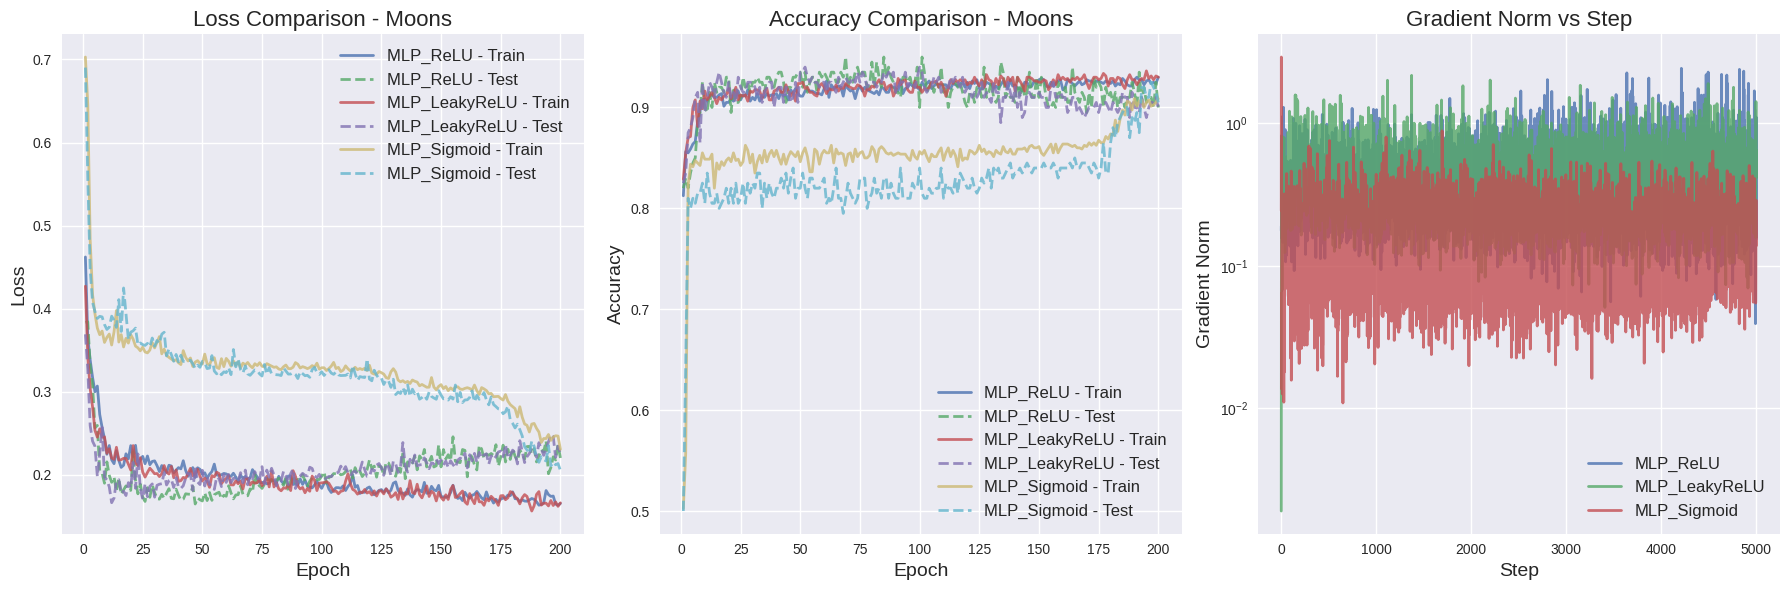

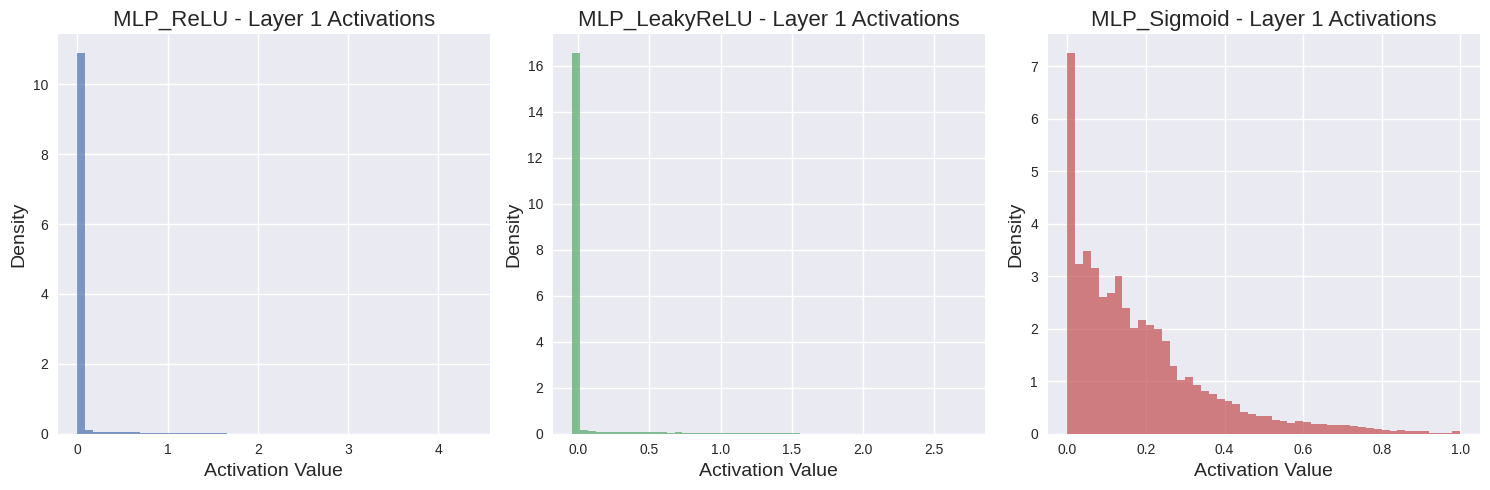

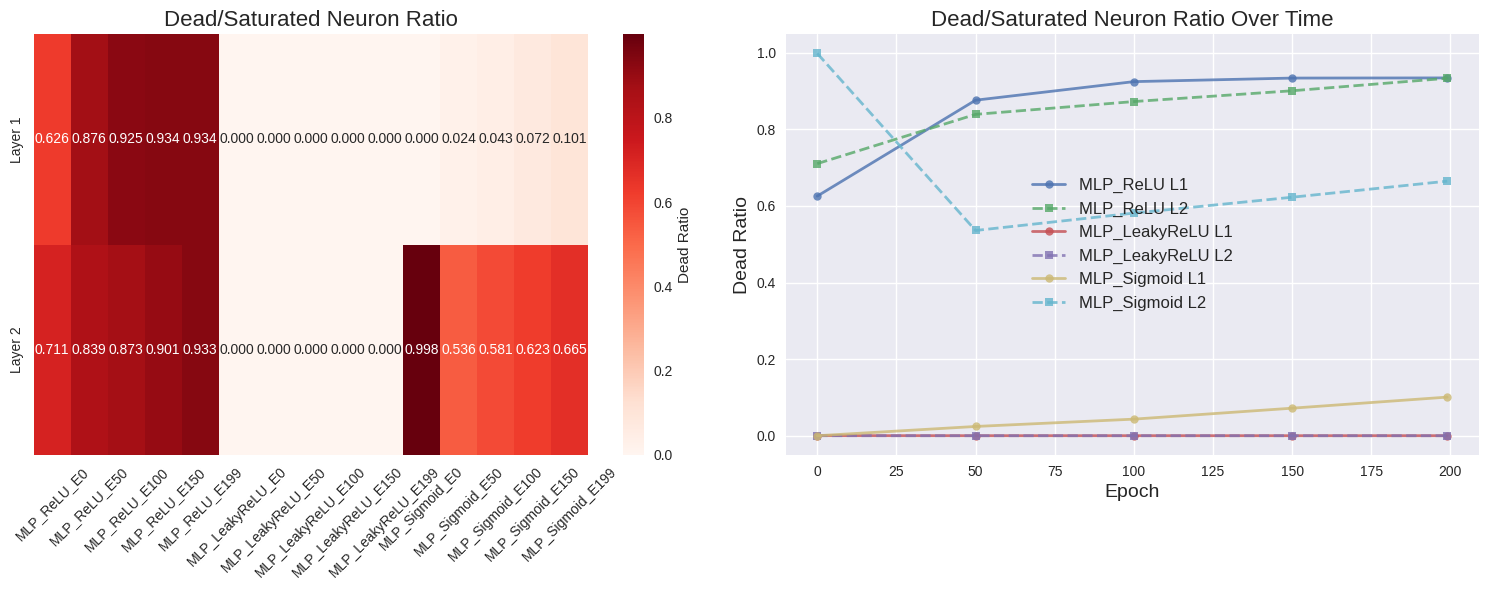

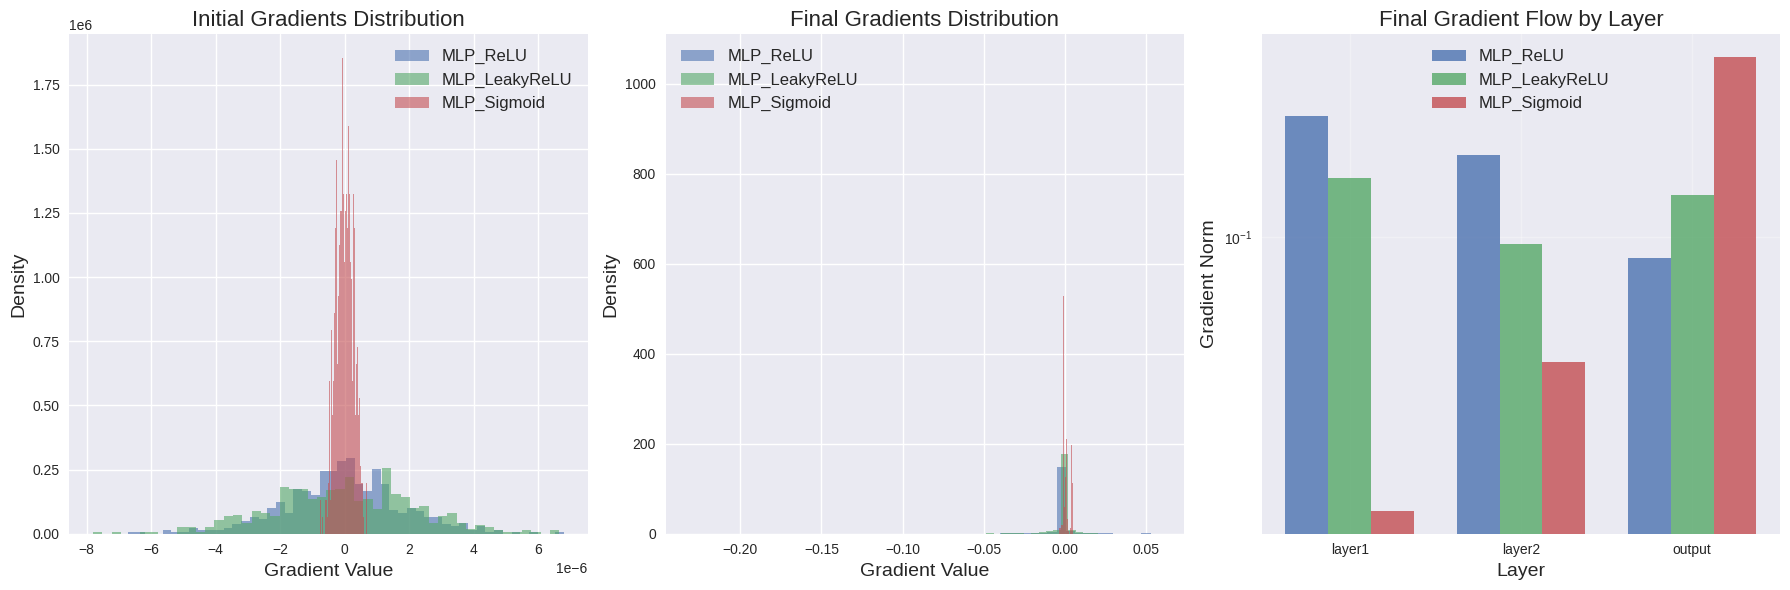

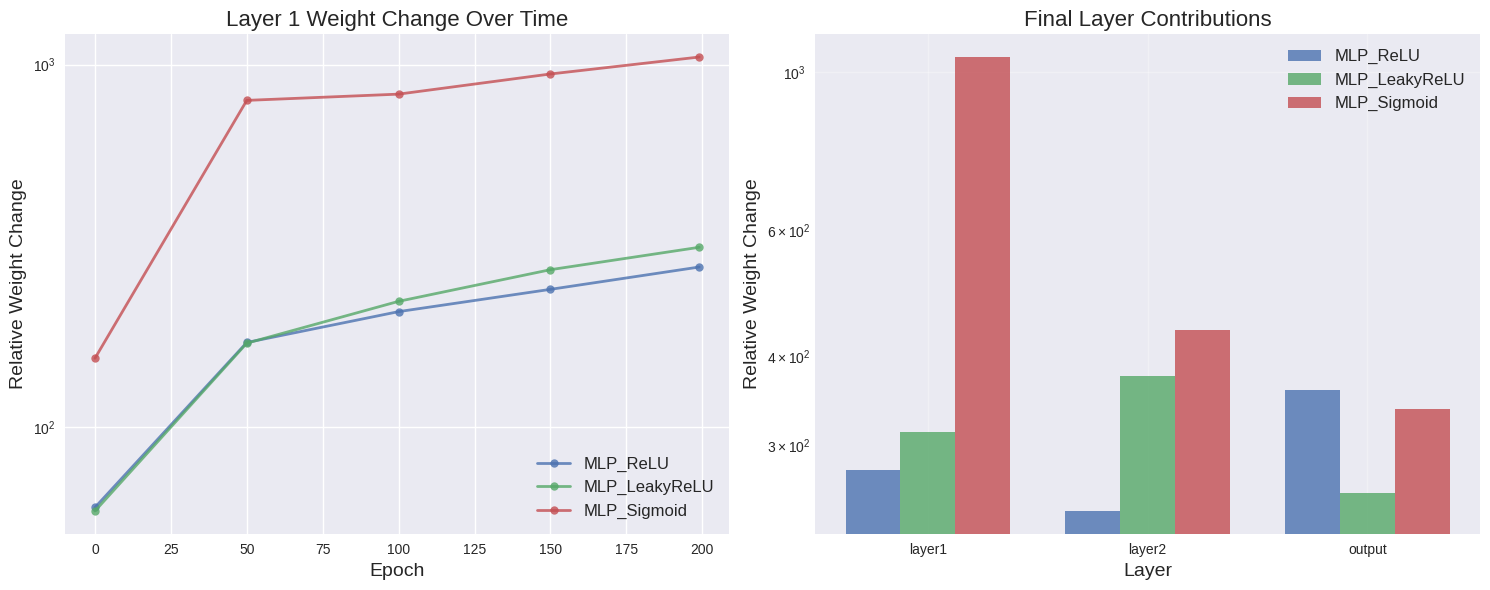


=== Moons 데이터셋 활성화 함수 비교 ===
Activation Function Final Accuracy (%) Min Loss  Epochs to Converge Avg Dead Ratio
           MLP_ReLU              90.00   0.1650                   7          0.934
      MLP_LeakyReLU              90.00   0.1666                   3          0.000
        MLP_Sigmoid              90.50   0.2054                  11          0.383

결정 경계 시각화...

실험 B 완료!
생성된 파일들:
- experiment_b_moons_results.png
- decision_boundary_mlp_relu_moons.png
- decision_boundary_mlp_leakyrelu_moons.png
- decision_boundary_mlp_sigmoid_moons.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from tqdm import tqdm

# 시드 설정 (재현성을 위해)
torch.manual_seed(42)
np.random.seed(42)

# 하이퍼파라미터 설정
NUM_EPOCHS = 200     # make_moons 데이터셋 권장 에폭 수
BATCH_SIZE = 32      # 작은 데이터셋에 적합한 배치 크기
LEARNING_RATE = 0.01 # Adam에 권장되는 학습률

# 데이터 준비 함수들
def prepare_moons_data(n_samples=1000, noise=0.3):
    """
    make_moons 데이터셋 준비
    """
    # 데이터 생성
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # PyTorch 텐서로 변환
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # 데이터로더 생성
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Make_moons 데이터 준비 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 차원: 2D")
    print(f"  - 클래스 수: 2")

    return train_loader, test_loader, X_train, y_train, X_test, y_test

def prepare_circles_data(n_samples=1000, noise=0.2, factor=0.5):
    """
    make_circles 데이터셋 준비
    """
    # 데이터 생성
    X, y = make_circles(n_samples=n_samples, noise=noise, factor=factor, random_state=42)

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # PyTorch 텐서로 변환
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # 데이터로더 생성
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Make_circles 데이터 준비 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 차원: 2D")
    print(f"  - 클래스 수: 2")

    return train_loader, test_loader, X_train, y_train, X_test, y_test

# 다양한 활성화 함수를 가진 MLP 모델들
class MLP_ReLU(nn.Module):
    """ReLU 활성화 함수를 사용하는 MLP"""
    def __init__(self, input_size=2, num_classes=2):
        super(MLP_ReLU, self).__init__()

        # Dead ReLU 유도를 위해 작은 weight 초기화
        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

        # 가중치 초기화 (작은 표준편차로 Dead ReLU 유도)
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.001)
                nn.init.constant_(layer.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

class MLP_LeakyReLU(nn.Module):
    """LeakyReLU 활성화 함수를 사용하는 MLP"""
    def __init__(self, input_size=2, num_classes=2):
        super(MLP_LeakyReLU, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.LeakyReLU(negative_slope=0.01),  # negative_slope=0.01
            nn.Linear(256, 128),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(128, num_classes)
        )

        # 동일한 초기화 조건
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.001)
                nn.init.constant_(layer.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

class MLP_Sigmoid(nn.Module):
    """Sigmoid 활성화 함수를 사용하는 MLP"""
    def __init__(self, input_size=2, num_classes=2):
        super(MLP_Sigmoid, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.Sigmoid(),
            nn.Linear(256, 128),
            nn.Sigmoid(),
            nn.Linear(128, num_classes)
        )

        # 동일한 초기화 조건
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.001)
                nn.init.constant_(layer.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

# 활성화 분포 추적 함수
def track_activations_during_training(model, data_loader, device, epoch):
    """학습 중 각 레이어의 활성화 분포 추적"""
    model.eval()
    activations = {
        'layer1': [],  # 첫 번째 활성화 함수 출력
        'layer2': [],  # 두 번째 활성화 함수 출력
        'logits': []   # 최종 출력 (로짓)
    }

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)

            # 중간 활성화 값들 추출
            x = inputs

            # 첫 번째 레이어 + 활성화
            x = model.layers[0](x)  # Linear
            x = model.layers[1](x)  # Activation
            activations['layer1'].extend(x.cpu().numpy().flatten())

            # 두 번째 레이어 + 활성화
            x = model.layers[2](x)  # Linear
            x = model.layers[3](x)  # Activation
            activations['layer2'].extend(x.cpu().numpy().flatten())

            # 출력 레이어
            x = model.layers[4](x)  # Linear (logits)
            activations['logits'].extend(x.cpu().numpy().flatten())

    return activations

# Dead ReLU 분석 함수
def analyze_dead_neurons(activations, activation_type):
    """Dead ReLU 뉴런 비율 분석"""
    dead_ratios = {}

    for layer_name, values in activations.items():
        if layer_name != 'logits':  # 로짓은 제외
            values_array = np.array(values)

            if activation_type == 'ReLU':
                # ReLU: 정확히 0인 뉴런들
                dead_ratio = np.sum(values_array == 0.0) / len(values_array)
            elif activation_type == 'LeakyReLU':
                # LeakyReLU: 매우 작은 값 (음수 영역에서 0.01 * input)
                dead_ratio = np.sum(np.abs(values_array) < 1e-6) / len(values_array)
            elif activation_type == 'Sigmoid':
                # Sigmoid: 포화 구간 (0에 가깝거나 1에 가까운 값들)
                saturated = np.sum((values_array < 0.01) | (values_array > 0.99))
                dead_ratio = saturated / len(values_array)
            else:
                dead_ratio = 0.0

            dead_ratios[layer_name] = dead_ratio

    return dead_ratios
# analyze_dead_neurons 함수 다음에 추가
def analyze_layer_contributions(model, initial_weights, current_weights):
    """각 레이어의 학습 기여도 분석"""
    contributions = {}
    layer_names = ['layer1', 'layer2', 'output']

    # initial_weights는 Linear 레이어만 저장되어 있으므로 [0, 1, 2] 인덱스 사용
    for i, layer_name in enumerate(layer_names):
        initial_weight = initial_weights[i]  # 수정: linear_idx 대신 i 사용
        current_weight = current_weights[i]   # 수정: linear_idx 대신 i 사용

        weight_change = torch.norm(current_weight - initial_weight).item()
        relative_change = weight_change / (torch.norm(initial_weight).item() + 1e-8)

        contributions[layer_name] = {
            'weight_change': weight_change,
            'relative_change': relative_change
        }

    return contributions
def analyze_gradient_flow(model, data_loader, device):
    """각 레이어의 그래디언트 흐름 분석"""
    model.train()
    inputs, targets = next(iter(data_loader))
    inputs, targets = inputs.to(device), targets.to(device)

    criterion = nn.CrossEntropyLoss()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    model.zero_grad()
    loss.backward()

    gradient_info = {}
    layer_names = ['layer1', 'layer2', 'output']
    linear_indices = [0, 2, 4]  # 실제 model.layers에서의 Linear 레이어 위치

    for layer_name, linear_idx in zip(layer_names, linear_indices):
        layer = model.layers[linear_idx]
        if layer.weight.grad is not None:
            grad_norm = torch.norm(layer.weight.grad).item()
            gradient_info[layer_name] = {
                'grad_norm': grad_norm,
                'grad_values': layer.weight.grad.cpu().numpy().flatten()
            }

    return gradient_info
# 모델 학습 함수
def train_activation_model(model, train_loader, test_loader, num_epochs, model_name):
    """활성화 함수별 모델 학습 - 모든 분석 포함"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 손실 함수 및 최적화기 설정
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 초기 가중치 저장 (기여도 분석용)
    initial_weights = []
    for layer in model.layers:
        if isinstance(layer, nn.Linear):
            initial_weights.append(layer.weight.data.clone())

    # 학습 결과 기록
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    grad_norms = []

    # 활성화 분포 기록 (특정 에폭에서)
    activation_history = {}
    dead_neuron_history = []

    # 그래디언트 분포 기록
    initial_gradients = []
    final_gradients = []

    # Layer별 기여도 기록
    layer_contributions_history = []

    # 그래디언트 흐름 기록
    gradient_flow_history = {}

    print(f"\n=== {model_name} 모델 학습 시작 ===")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # 그래디언트 노름 계산
            grad_norm = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    grad_norm += param_norm.item() ** 2
            grad_norm = grad_norm ** 0.5
            grad_norms.append(grad_norm)

            # 그래디언트 분포 저장 (첫 번째와 마지막 에폭)
            if epoch == 0 and batch_idx == 0:
                for name, param in model.named_parameters():
                    if param.grad is not None and 'weight' in name:
                        initial_gradients.append((name, param.grad.cpu().numpy().flatten()))

            if epoch == num_epochs - 1 and batch_idx == 0:
                for name, param in model.named_parameters():
                    if param.grad is not None and 'weight' in name:
                        final_gradients.append((name, param.grad.cpu().numpy().flatten()))

            optimizer.step()

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        # 에폭별 메트릭 계산
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # 테스트 평가
        test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)

        # 결과 기록
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # 특정 에폭에서 심화 분석 수행
        if epoch % 50 == 0 or epoch == num_epochs - 1:
            # 1. 활성화 분포 기록
            activations = track_activations_during_training(model, test_loader, device, epoch)
            activation_history[epoch] = activations

            # 2. Dead 뉴런 비율 계산
            dead_ratios = analyze_dead_neurons(activations, model_name.split('_')[1])
            dead_neuron_history.append({
                'epoch': epoch,
                'layer1_dead': dead_ratios.get('layer1', 0),
                'layer2_dead': dead_ratios.get('layer2', 0)
            })

            # 3. Layer별 기여도 분석
            current_weights = []
            for layer in model.layers:
                if isinstance(layer, nn.Linear):
                    current_weights.append(layer.weight.data.clone())

            contributions = analyze_layer_contributions(model, initial_weights, current_weights)
            contributions['epoch'] = epoch
            layer_contributions_history.append(contributions)

            # 4. 그래디언트 흐름 분석 (100 에폭마다)
            if epoch % 100 == 0 or epoch == num_epochs - 1:
                grad_flow = analyze_gradient_flow(model, test_loader, device)
                gradient_flow_history[epoch] = grad_flow

                # 그래디언트 흐름 정보 출력
                print(f"  Epoch {epoch+1} - Gradient Flow:")
                for layer_name, info in grad_flow.items():
                    print(f"    {layer_name}: Grad Norm = {info['grad_norm']:.6f}")

        # 진행상황 출력 (50 에폭마다)
        if epoch % 50 == 0 or epoch == num_epochs - 1:
            # Dead neuron 정보도 함께 출력
            if dead_neuron_history:
                latest_dead = dead_neuron_history[-1]
                print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, '
                      f'Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, '
                      f'Test Acc: {test_acc:.4f}')
                print(f'  Dead Ratios - L1: {latest_dead["layer1_dead"]:.3f}, '
                      f'L2: {latest_dead["layer2_dead"]:.3f}')
            else:
                print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, '
                      f'Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, '
                      f'Test Acc: {test_acc:.4f}')

    # 최종 분석 정보 출력
    print(f"\n=== {model_name} 학습 완료 ===")
    print(f"최종 성능 - Train: {train_accs[-1]:.4f}, Test: {test_accs[-1]:.4f}")
    if dead_neuron_history:
        final_dead = dead_neuron_history[-1]
        print(f"최종 Dead Ratio - L1: {final_dead['layer1_dead']:.3f}, L2: {final_dead['layer2_dead']:.3f}")

    if gradient_flow_history:
        final_epoch = max(gradient_flow_history.keys())
        print(f"최종 Gradient Flow:")
        for layer_name, info in gradient_flow_history[final_epoch].items():
            print(f"  {layer_name}: {info['grad_norm']:.6f}")

    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_losses': test_losses,
        'test_accs': test_accs,
        'grad_norms': grad_norms,
        'activation_history': activation_history,
        'dead_neuron_history': dead_neuron_history,
        'initial_gradients': initial_gradients,
        'final_gradients': final_gradients,
        'layer_contributions_history': layer_contributions_history,
        'gradient_flow_history': gradient_flow_history
    }
# 평가 함수
def evaluate_model(model, data_loader, criterion, device):
    """모델 평가"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy

# 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y, title):
    """2D 결정 경계 시각화"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    # 격자 생성
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 예측
    grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)

    with torch.no_grad():
        predictions = model(grid_points)
        predictions = torch.softmax(predictions, dim=1)[:, 1]  # 클래스 1의 확률
        predictions = predictions.cpu().numpy().reshape(xx.shape)

    # 시각화
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, predictions, levels=50, alpha=0.8, cmap='RdYlBu')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.colorbar(scatter)
    plt.title(f'Decision Boundary - {title}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    return plt.gcf()

# 종합 시각화 함수
def visualize_activation_comparison(results_dict, dataset_name):
   """활성화 함수 비교 결과 시각화 - 큰 크기로 개선"""
   plt.style.use('seaborn-v0_8')

   activation_functions = list(results_dict.keys())
   epochs = range(1, len(results_dict[activation_functions[0]]['train_losses']) + 1)

   # 1. 기본 성능 비교 (큰 크기)
   fig1 = plt.figure(figsize=(18, 6))

   # Loss 비교
   plt.subplot(1, 3, 1)
   for act_func in activation_functions:
       plt.plot(epochs, results_dict[act_func]['train_losses'],
               label=f'{act_func} - Train', alpha=0.8, linewidth=2)
       plt.plot(epochs, results_dict[act_func]['test_losses'],
               label=f'{act_func} - Test', linestyle='--', alpha=0.8, linewidth=2)
   plt.title(f'Loss Comparison - {dataset_name}', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Loss', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)

   # Accuracy 비교
   plt.subplot(1, 3, 2)
   for act_func in activation_functions:
       plt.plot(epochs, results_dict[act_func]['train_accs'],
               label=f'{act_func} - Train', alpha=0.8, linewidth=2)
       plt.plot(epochs, results_dict[act_func]['test_accs'],
               label=f'{act_func} - Test', linestyle='--', alpha=0.8, linewidth=2)
   plt.title(f'Accuracy Comparison - {dataset_name}', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Accuracy', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)

   # Gradient Norm 비교
   plt.subplot(1, 3, 3)
   for act_func in activation_functions:
       grad_norms = results_dict[act_func]['grad_norms']
       steps = range(1, len(grad_norms) + 1)
       plt.plot(steps, grad_norms, label=act_func, alpha=0.8, linewidth=2)
   plt.title('Gradient Norm vs Step', fontsize=16)
   plt.xlabel('Step', fontsize=14)
   plt.ylabel('Gradient Norm', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)
   plt.yscale('log')

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_basic_comparison.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 2. 활성화 분포 비교 (큰 크기)
   fig2 = plt.figure(figsize=(15, 5))

   for i, act_func in enumerate(activation_functions):
       plt.subplot(1, 3, i+1)
       final_epoch = max(results_dict[act_func]['activation_history'].keys())
       layer1_activations = results_dict[act_func]['activation_history'][final_epoch]['layer1']

       plt.hist(layer1_activations, bins=50, alpha=0.7, density=True, color=f'C{i}')
       plt.title(f'{act_func} - Layer 1 Activations', fontsize=16)
       plt.xlabel('Activation Value', fontsize=14)
       plt.ylabel('Density', fontsize=14)
       plt.grid(True)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_activations.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 3. Dead Neuron 분석 (큰 크기)
   fig3 = plt.figure(figsize=(15, 6))

   # Dead Neuron 히트맵
   plt.subplot(1, 2, 1)
   heatmap_data = []
   epoch_labels = []

   for act_func in activation_functions:
       dead_history = results_dict[act_func]['dead_neuron_history']
       for record in dead_history:
           heatmap_data.append([record['layer1_dead'], record['layer2_dead']])
           epoch_labels.append(f"{act_func}_E{record['epoch']}")

   heatmap_array = np.array(heatmap_data).T
   sns.heatmap(heatmap_array,
               xticklabels=epoch_labels,
               yticklabels=['Layer 1', 'Layer 2'],
               annot=True, fmt='.3f', cmap='Reds', cbar_kws={'label': 'Dead Ratio'})
   plt.title('Dead/Saturated Neuron Ratio', fontsize=16)
   plt.xticks(rotation=45)

   # Dead Neuron 변화 그래프
   plt.subplot(1, 2, 2)
   for act_func in activation_functions:
       dead_history = results_dict[act_func]['dead_neuron_history']
       epochs_recorded = [record['epoch'] for record in dead_history]
       layer1_dead = [record['layer1_dead'] for record in dead_history]
       layer2_dead = [record['layer2_dead'] for record in dead_history]

       plt.plot(epochs_recorded, layer1_dead, 'o-', label=f'{act_func} L1', alpha=0.8, linewidth=2, markersize=6)
       plt.plot(epochs_recorded, layer2_dead, 's--', label=f'{act_func} L2', alpha=0.8, linewidth=2, markersize=6)

   plt.title('Dead/Saturated Neuron Ratio Over Time', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Dead Ratio', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_dead_neurons.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 4. 그래디언트 분석 (큰 크기)
   fig4 = plt.figure(figsize=(18, 6))

   # Initial vs Final Gradients
   for i, (timing, grad_key) in enumerate([('Initial', 'initial_gradients'), ('Final', 'final_gradients')]):
       plt.subplot(1, 3, i+1)

       for act_func in activation_functions:
           if results_dict[act_func][grad_key]:
               grad_values = results_dict[act_func][grad_key][0][1]
               plt.hist(grad_values, bins=50, alpha=0.6, label=act_func, density=True)

       plt.title(f'{timing} Gradients Distribution', fontsize=16)
       plt.xlabel('Gradient Value', fontsize=14)
       plt.ylabel('Density', fontsize=14)
       plt.legend(fontsize=12)
       plt.grid(True)

   # Layer별 그래디언트 흐름
   plt.subplot(1, 3, 3)
   layer_names = ['layer1', 'layer2', 'output']
   width = 0.25
   x = np.arange(len(layer_names))

   for i, act_func in enumerate(activation_functions):
       grad_flow = results_dict[act_func]['gradient_flow_history']
       final_epoch = max(grad_flow.keys())
       grad_norms = [grad_flow[final_epoch][layer]['grad_norm'] for layer in layer_names]

       plt.bar(x + i * width, grad_norms, width, label=act_func, alpha=0.8)

   plt.title('Final Gradient Flow by Layer', fontsize=16)
   plt.xlabel('Layer', fontsize=14)
   plt.ylabel('Gradient Norm', fontsize=14)
   plt.xticks(x + width, layer_names)
   plt.legend(fontsize=12)
   plt.yscale('log')
   plt.grid(True, alpha=0.3)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_gradients.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 5. Layer 기여도 분석 (큰 크기)
   fig5 = plt.figure(figsize=(15, 6))

   # Layer 1 Weight Change
   plt.subplot(1, 2, 1)
   for act_func in activation_functions:
       contrib_history = results_dict[act_func]['layer_contributions_history']
       epochs_recorded = [record['epoch'] for record in contrib_history]
       layer1_changes = [record['layer1']['relative_change'] for record in contrib_history]

       plt.plot(epochs_recorded, layer1_changes, 'o-', label=f'{act_func}',
               alpha=0.8, linewidth=2, markersize=6)

   plt.title('Layer 1 Weight Change Over Time', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Relative Weight Change', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)
   plt.yscale('log')

   # 전체 레이어 기여도 비교
   plt.subplot(1, 2, 2)
   for act_func in activation_functions:
       contrib_history = results_dict[act_func]['layer_contributions_history']
       if contrib_history:
           final_contrib = contrib_history[-1]
           layers = ['layer1', 'layer2', 'output']
           changes = [final_contrib[layer]['relative_change'] for layer in layers]

           x_pos = np.arange(len(layers))
           plt.bar(x_pos + list(activation_functions).index(act_func) * 0.25,
                  changes, 0.25, label=act_func, alpha=0.8)

   plt.title('Final Layer Contributions', fontsize=16)
   plt.xlabel('Layer', fontsize=14)
   plt.ylabel('Relative Weight Change', fontsize=14)
   plt.xticks(x_pos + 0.25, layers)
   plt.legend(fontsize=12)
   plt.yscale('log')
   plt.grid(True, alpha=0.3)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_contributions.png', dpi=300, bbox_inches='tight')
   plt.show()

# 정량적 비교 표 생성
def create_activation_comparison_table(results_dict, dataset_name):
    """활성화 함수 성능 비교 표"""
    data = []

    for act_func, results in results_dict.items():
        final_acc = results['test_accs'][-1] * 100
        min_loss = min(results['test_losses'])
        max_acc = max(results['test_accs'])

        # 90% 최대 성능 도달 에폭
        convergence = next((i+1 for i, acc in enumerate(results['test_accs'])
                          if acc >= 0.9 * max_acc), len(results['test_accs']))

        # 최종 Dead 뉴런 비율
        final_dead = results['dead_neuron_history'][-1] if results['dead_neuron_history'] else {'layer1_dead': 0, 'layer2_dead': 0}
        avg_dead_ratio = (final_dead['layer1_dead'] + final_dead['layer2_dead']) / 2

        data.append([
            act_func,
            f'{final_acc:.2f}',
            f'{min_loss:.4f}',
            convergence,
            f'{avg_dead_ratio:.3f}'
        ])

    df = pd.DataFrame(data, columns=[
        'Activation Function',
        'Final Accuracy (%)',
        'Min Loss',
        'Epochs to Converge',
        'Avg Dead Ratio'
    ])

    print(f"\n=== {dataset_name} 데이터셋 활성화 함수 비교 ===")
    print(df.to_string(index=False))

    return df

# 메인 실행 함수
def main():
    """실험 B 메인 실행 함수"""
    print("=" * 60)
    print("실험 B: 활성화 함수 비교 (ReLU vs LeakyReLU vs Sigmoid)")
    print("=" * 60)

    # 데이터셋 선택 (make_moons 또는 make_circles)
    dataset_choice = "moons"  # "moons" 또는 "circles" 선택

    if dataset_choice == "moons":
        train_loader, test_loader, X_train, y_train, X_test, y_test = prepare_moons_data()
    else:
        train_loader, test_loader, X_train, y_train, X_test, y_test = prepare_circles_data()

    # 모델 정의
    models = {
        'MLP_ReLU': MLP_ReLU(),
        'MLP_LeakyReLU': MLP_LeakyReLU(),
        'MLP_Sigmoid': MLP_Sigmoid()
    }

    # 각 모델 학습 및 결과 저장
    results = {}

    for model_name, model in models.items():
        print(f"\n{'='*50}")
        print(f"{model_name} 학습 시작")
        print(f"{'='*50}")

        results[model_name] = train_activation_model(
            model, train_loader, test_loader, NUM_EPOCHS, model_name
        )

    # 결과 시각화
    print("\n" + "="*60)
    print("결과 시각화 및 분석")
    print("="*60)

    visualize_activation_comparison(results, dataset_choice.title())

    # 정량적 비교 표
    comparison_df = create_activation_comparison_table(results, dataset_choice.title())

    # 결정 경계 시각화 (선택사항)
    print("\n결정 경계 시각화...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for model_name, model in models.items():
        model.to(device)
        fig = plot_decision_boundary(model, X_test, y_test, model_name)
        plt.savefig(f'decision_boundary_{model_name.lower()}_{dataset_choice}.png', dpi=300)
        plt.close()

    print("\n실험 B 완료!")
    print("생성된 파일들:")
    print(f"- experiment_b_{dataset_choice}_results.png")
    print(f"- decision_boundary_mlp_relu_{dataset_choice}.png")
    print(f"- decision_boundary_mlp_leakyrelu_{dataset_choice}.png")
    print(f"- decision_boundary_mlp_sigmoid_{dataset_choice}.png")

if __name__ == "__main__":
    main()

# 실험 B 비 정상적 실험 epoch 수 200이상으로 진동발생

실험 B: 활성화 함수 비교 (ReLU vs LeakyReLU vs Sigmoid)
Make_moons 데이터 준비 완료:
  - 학습 데이터: 800 samples
  - 테스트 데이터: 200 samples
  - 입력 차원: 2D
  - 클래스 수: 2

MLP_ReLU 학습 시작

=== MLP_ReLU 모델 학습 시작 ===
  Epoch 1 - Gradient Flow:
    layer1: Grad Norm = 0.158964
    layer2: Grad Norm = 0.076978
    output: Grad Norm = 0.545736
Epoch 1/800, Train Loss: 0.4623, Train Acc: 0.8125, Test Loss: 0.3836, Test Acc: 0.8200
  Dead Ratios - L1: 0.626, L2: 0.711
Epoch 51/800, Train Loss: 0.2026, Train Acc: 0.9113, Test Loss: 0.1786, Test Acc: 0.9200
  Dead Ratios - L1: 0.876, L2: 0.839
  Epoch 101 - Gradient Flow:
    layer1: Grad Norm = 0.211972
    layer2: Grad Norm = 0.109847
    output: Grad Norm = 0.100834
Epoch 101/800, Train Loss: 0.1898, Train Acc: 0.9250, Test Loss: 0.2038, Test Acc: 0.9500
  Dead Ratios - L1: 0.925, L2: 0.873
Epoch 151/800, Train Loss: 0.1736, Train Acc: 0.9287, Test Loss: 0.2305, Test Acc: 0.9300
  Dead Ratios - L1: 0.934, L2: 0.901
  Epoch 201 - Gradient Flow:
    layer1: Grad Norm = 

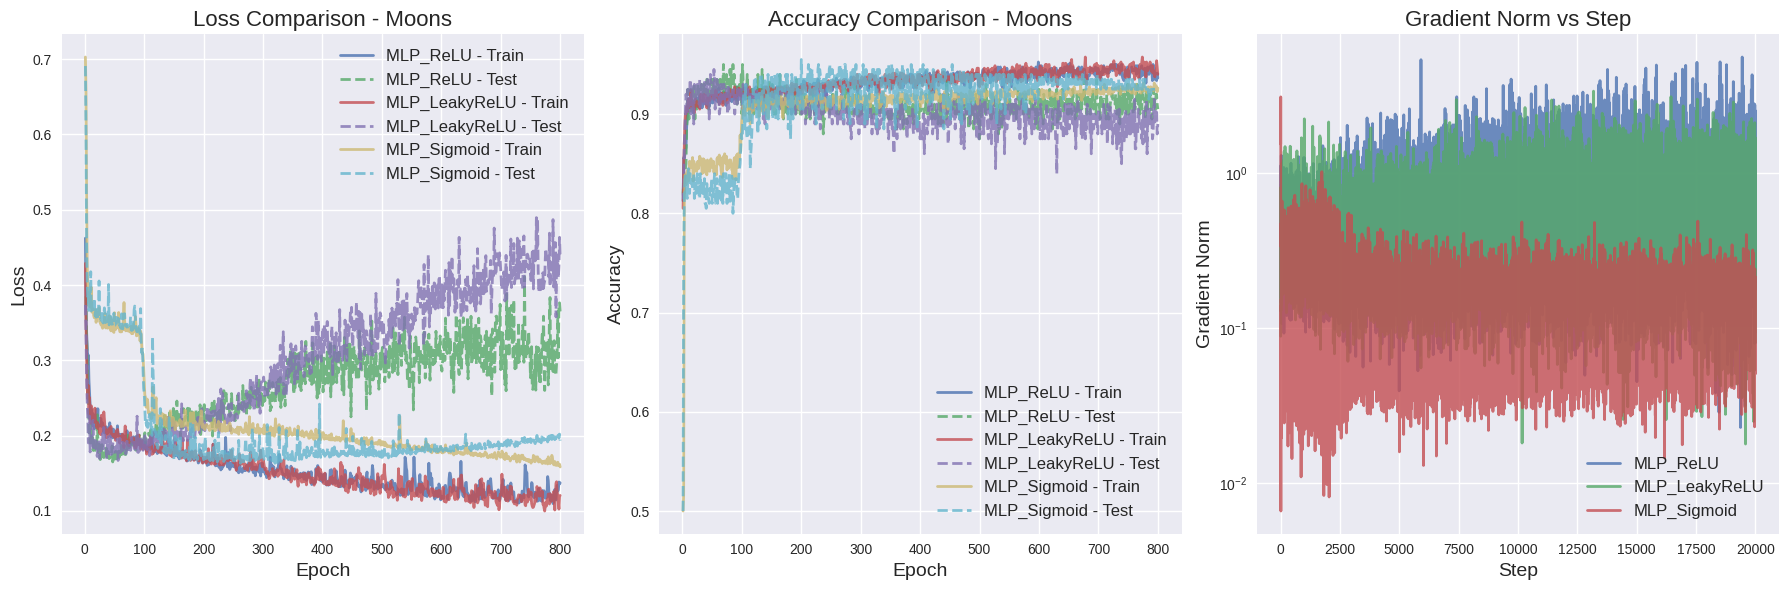

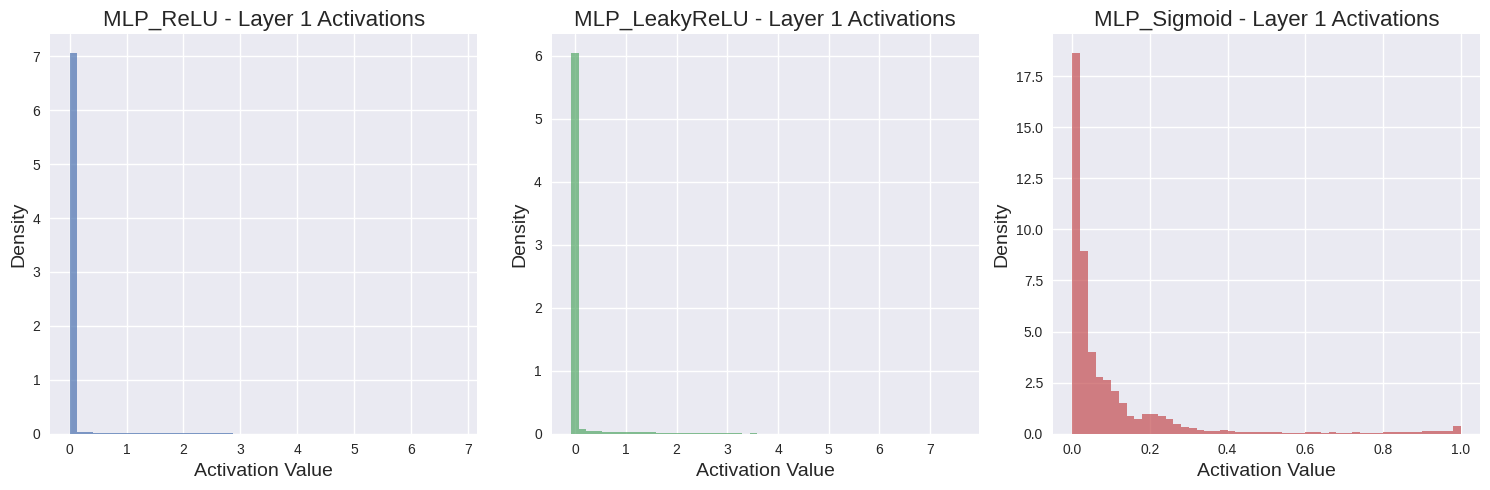

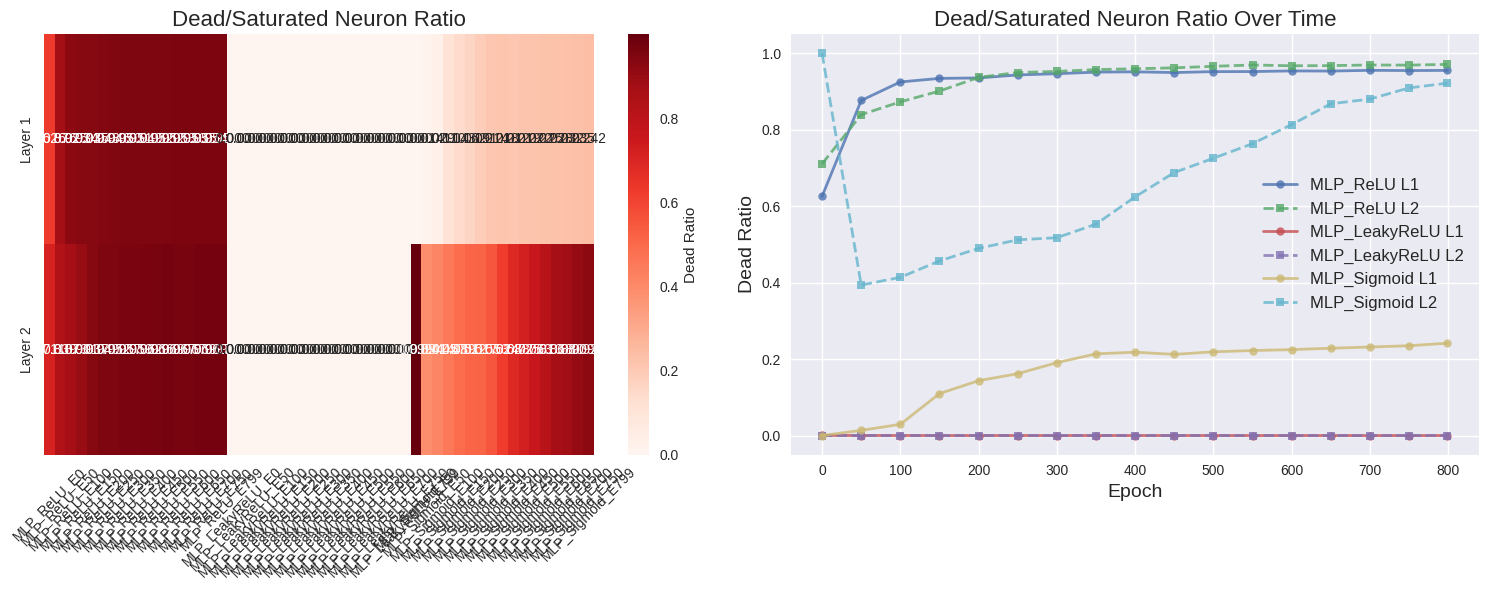

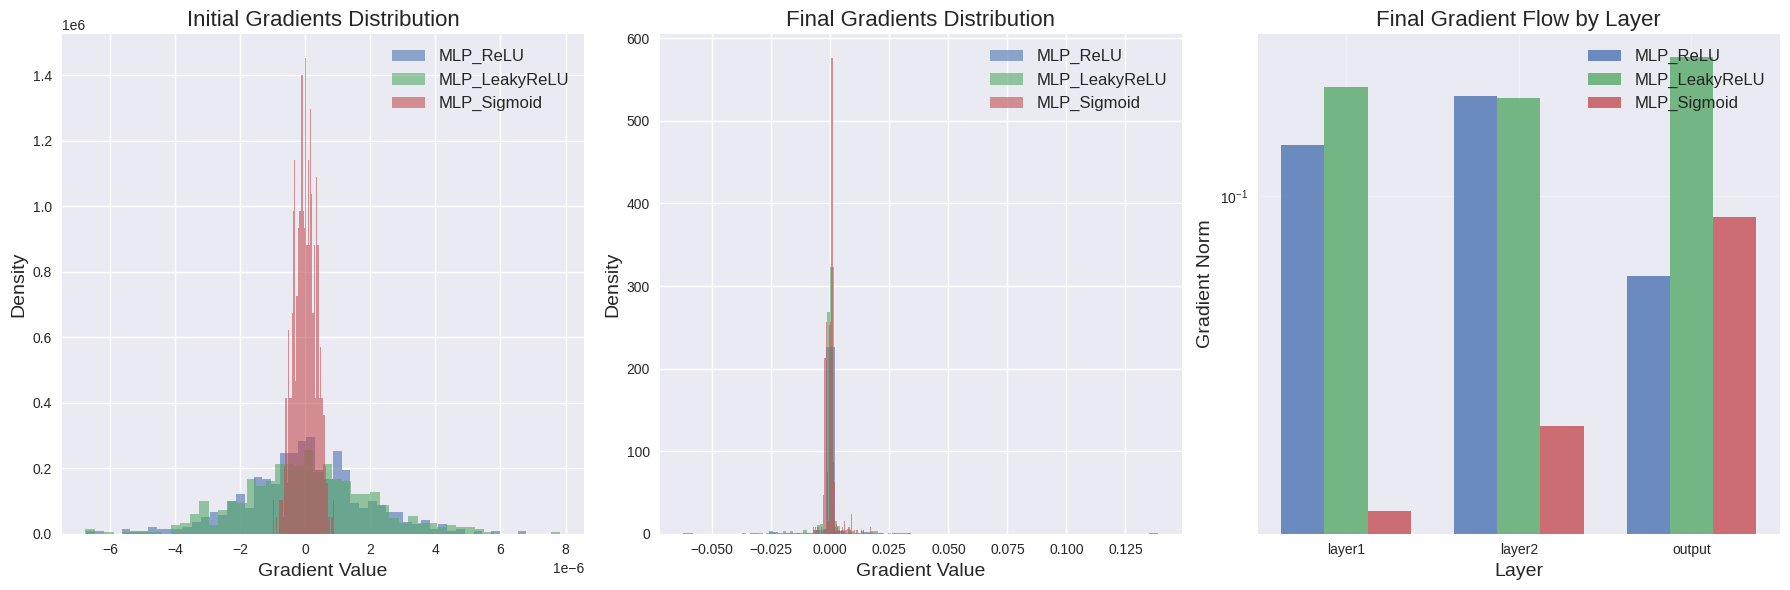

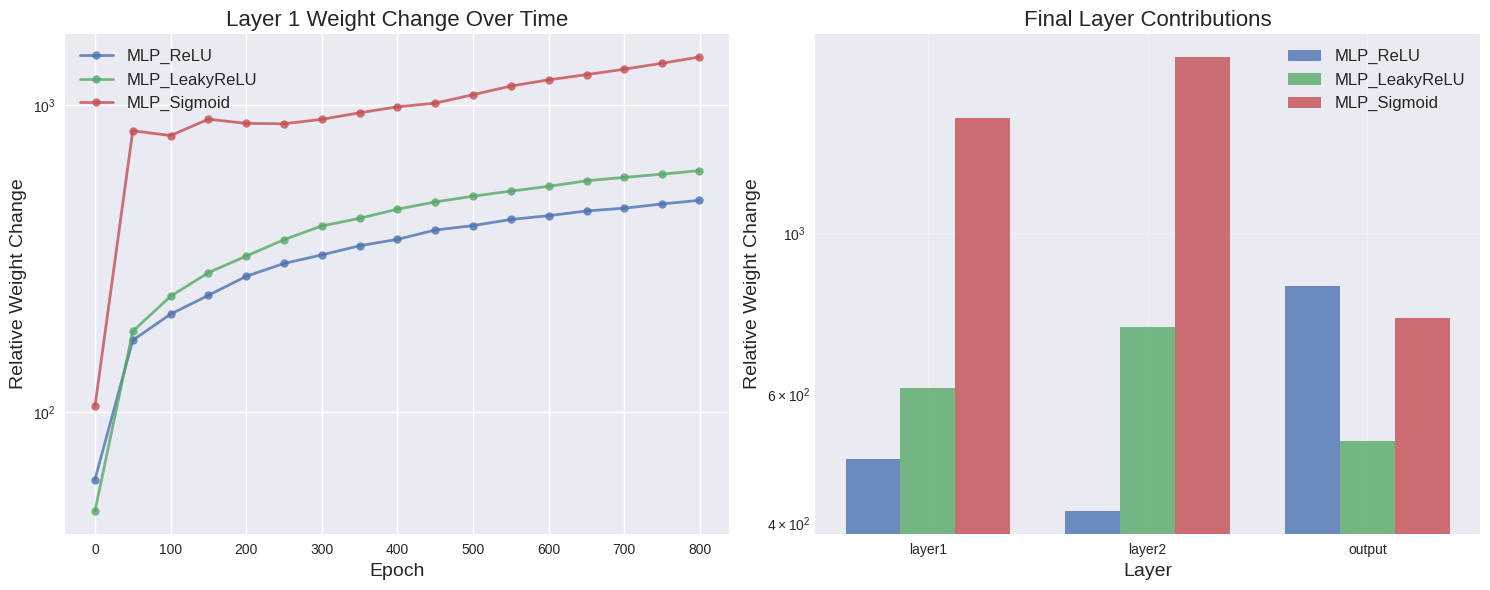


=== Moons 데이터셋 활성화 함수 비교 ===
Activation Function Final Accuracy (%) Min Loss  Epochs to Converge Avg Dead Ratio
           MLP_ReLU              90.50   0.1650                   7          0.963
      MLP_LeakyReLU              89.00   0.1670                   3          0.000
        MLP_Sigmoid              92.50   0.1633                  98          0.581

결정 경계 시각화...

실험 B 완료!
생성된 파일들:
- experiment_b_moons_results.png
- decision_boundary_mlp_relu_moons.png
- decision_boundary_mlp_leakyrelu_moons.png
- decision_boundary_mlp_sigmoid_moons.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from tqdm import tqdm

# 시드 설정 (재현성을 위해)
torch.manual_seed(42)
np.random.seed(42)

# 하이퍼파라미터 설정
NUM_EPOCHS = 800     # make_moons 데이터셋 권장 에폭 수
BATCH_SIZE = 32      # 작은 데이터셋에 적합한 배치 크기
LEARNING_RATE = 0.01 # Adam에 권장되는 학습률

# 데이터 준비 함수들
def prepare_moons_data(n_samples=1000, noise=0.3):
    """
    make_moons 데이터셋 준비
    """
    # 데이터 생성
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # PyTorch 텐서로 변환
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # 데이터로더 생성
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Make_moons 데이터 준비 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 차원: 2D")
    print(f"  - 클래스 수: 2")

    return train_loader, test_loader, X_train, y_train, X_test, y_test

def prepare_circles_data(n_samples=1000, noise=0.2, factor=0.5):
    """
    make_circles 데이터셋 준비
    """
    # 데이터 생성
    X, y = make_circles(n_samples=n_samples, noise=noise, factor=factor, random_state=42)

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # PyTorch 텐서로 변환
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # 데이터로더 생성
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Make_circles 데이터 준비 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 차원: 2D")
    print(f"  - 클래스 수: 2")

    return train_loader, test_loader, X_train, y_train, X_test, y_test

# 다양한 활성화 함수를 가진 MLP 모델들
class MLP_ReLU(nn.Module):
    """ReLU 활성화 함수를 사용하는 MLP"""
    def __init__(self, input_size=2, num_classes=2):
        super(MLP_ReLU, self).__init__()

        # Dead ReLU 유도를 위해 작은 weight 초기화
        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

        # 가중치 초기화 (작은 표준편차로 Dead ReLU 유도)
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.001)
                nn.init.constant_(layer.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

class MLP_LeakyReLU(nn.Module):
    """LeakyReLU 활성화 함수를 사용하는 MLP"""
    def __init__(self, input_size=2, num_classes=2):
        super(MLP_LeakyReLU, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.LeakyReLU(negative_slope=0.01),  # negative_slope=0.01
            nn.Linear(256, 128),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(128, num_classes)
        )

        # 동일한 초기화 조건
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.001)
                nn.init.constant_(layer.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

class MLP_Sigmoid(nn.Module):
    """Sigmoid 활성화 함수를 사용하는 MLP"""
    def __init__(self, input_size=2, num_classes=2):
        super(MLP_Sigmoid, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.Sigmoid(),
            nn.Linear(256, 128),
            nn.Sigmoid(),
            nn.Linear(128, num_classes)
        )

        # 동일한 초기화 조건
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.001)
                nn.init.constant_(layer.bias, 0.0)

    def forward(self, x):
        return self.layers(x)

# 활성화 분포 추적 함수
def track_activations_during_training(model, data_loader, device, epoch):
    """학습 중 각 레이어의 활성화 분포 추적"""
    model.eval()
    activations = {
        'layer1': [],  # 첫 번째 활성화 함수 출력
        'layer2': [],  # 두 번째 활성화 함수 출력
        'logits': []   # 최종 출력 (로짓)
    }

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)

            # 중간 활성화 값들 추출
            x = inputs

            # 첫 번째 레이어 + 활성화
            x = model.layers[0](x)  # Linear
            x = model.layers[1](x)  # Activation
            activations['layer1'].extend(x.cpu().numpy().flatten())

            # 두 번째 레이어 + 활성화
            x = model.layers[2](x)  # Linear
            x = model.layers[3](x)  # Activation
            activations['layer2'].extend(x.cpu().numpy().flatten())

            # 출력 레이어
            x = model.layers[4](x)  # Linear (logits)
            activations['logits'].extend(x.cpu().numpy().flatten())

    return activations

# Dead ReLU 분석 함수
def analyze_dead_neurons(activations, activation_type):
    """Dead ReLU 뉴런 비율 분석"""
    dead_ratios = {}

    for layer_name, values in activations.items():
        if layer_name != 'logits':  # 로짓은 제외
            values_array = np.array(values)

            if activation_type == 'ReLU':
                # ReLU: 정확히 0인 뉴런들
                dead_ratio = np.sum(values_array == 0.0) / len(values_array)
            elif activation_type == 'LeakyReLU':
                # LeakyReLU: 매우 작은 값 (음수 영역에서 0.01 * input)
                dead_ratio = np.sum(np.abs(values_array) < 1e-6) / len(values_array)
            elif activation_type == 'Sigmoid':
                # Sigmoid: 포화 구간 (0에 가깝거나 1에 가까운 값들)
                saturated = np.sum((values_array < 0.01) | (values_array > 0.99))
                dead_ratio = saturated / len(values_array)
            else:
                dead_ratio = 0.0

            dead_ratios[layer_name] = dead_ratio

    return dead_ratios
# analyze_dead_neurons 함수 다음에 추가
def analyze_layer_contributions(model, initial_weights, current_weights):
    """각 레이어의 학습 기여도 분석"""
    contributions = {}
    layer_names = ['layer1', 'layer2', 'output']

    # initial_weights는 Linear 레이어만 저장되어 있으므로 [0, 1, 2] 인덱스 사용
    for i, layer_name in enumerate(layer_names):
        initial_weight = initial_weights[i]  # 수정: linear_idx 대신 i 사용
        current_weight = current_weights[i]   # 수정: linear_idx 대신 i 사용

        weight_change = torch.norm(current_weight - initial_weight).item()
        relative_change = weight_change / (torch.norm(initial_weight).item() + 1e-8)

        contributions[layer_name] = {
            'weight_change': weight_change,
            'relative_change': relative_change
        }

    return contributions
def analyze_gradient_flow(model, data_loader, device):
    """각 레이어의 그래디언트 흐름 분석"""
    model.train()
    inputs, targets = next(iter(data_loader))
    inputs, targets = inputs.to(device), targets.to(device)

    criterion = nn.CrossEntropyLoss()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    model.zero_grad()
    loss.backward()

    gradient_info = {}
    layer_names = ['layer1', 'layer2', 'output']
    linear_indices = [0, 2, 4]  # 실제 model.layers에서의 Linear 레이어 위치

    for layer_name, linear_idx in zip(layer_names, linear_indices):
        layer = model.layers[linear_idx]
        if layer.weight.grad is not None:
            grad_norm = torch.norm(layer.weight.grad).item()
            gradient_info[layer_name] = {
                'grad_norm': grad_norm,
                'grad_values': layer.weight.grad.cpu().numpy().flatten()
            }

    return gradient_info
# 모델 학습 함수
def train_activation_model(model, train_loader, test_loader, num_epochs, model_name):
    """활성화 함수별 모델 학습 - 모든 분석 포함"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # 손실 함수 및 최적화기 설정
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # 초기 가중치 저장 (기여도 분석용)
    initial_weights = []
    for layer in model.layers:
        if isinstance(layer, nn.Linear):
            initial_weights.append(layer.weight.data.clone())

    # 학습 결과 기록
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    grad_norms = []

    # 활성화 분포 기록 (특정 에폭에서)
    activation_history = {}
    dead_neuron_history = []

    # 그래디언트 분포 기록
    initial_gradients = []
    final_gradients = []

    # Layer별 기여도 기록
    layer_contributions_history = []

    # 그래디언트 흐름 기록
    gradient_flow_history = {}

    print(f"\n=== {model_name} 모델 학습 시작 ===")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # 그래디언트 노름 계산
            grad_norm = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    grad_norm += param_norm.item() ** 2
            grad_norm = grad_norm ** 0.5
            grad_norms.append(grad_norm)

            # 그래디언트 분포 저장 (첫 번째와 마지막 에폭)
            if epoch == 0 and batch_idx == 0:
                for name, param in model.named_parameters():
                    if param.grad is not None and 'weight' in name:
                        initial_gradients.append((name, param.grad.cpu().numpy().flatten()))

            if epoch == num_epochs - 1 and batch_idx == 0:
                for name, param in model.named_parameters():
                    if param.grad is not None and 'weight' in name:
                        final_gradients.append((name, param.grad.cpu().numpy().flatten()))

            optimizer.step()

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        # 에폭별 메트릭 계산
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # 테스트 평가
        test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)

        # 결과 기록
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        # 특정 에폭에서 심화 분석 수행
        if epoch % 50 == 0 or epoch == num_epochs - 1:
            # 1. 활성화 분포 기록
            activations = track_activations_during_training(model, test_loader, device, epoch)
            activation_history[epoch] = activations

            # 2. Dead 뉴런 비율 계산
            dead_ratios = analyze_dead_neurons(activations, model_name.split('_')[1])
            dead_neuron_history.append({
                'epoch': epoch,
                'layer1_dead': dead_ratios.get('layer1', 0),
                'layer2_dead': dead_ratios.get('layer2', 0)
            })

            # 3. Layer별 기여도 분석
            current_weights = []
            for layer in model.layers:
                if isinstance(layer, nn.Linear):
                    current_weights.append(layer.weight.data.clone())

            contributions = analyze_layer_contributions(model, initial_weights, current_weights)
            contributions['epoch'] = epoch
            layer_contributions_history.append(contributions)

            # 4. 그래디언트 흐름 분석 (100 에폭마다)
            if epoch % 100 == 0 or epoch == num_epochs - 1:
                grad_flow = analyze_gradient_flow(model, test_loader, device)
                gradient_flow_history[epoch] = grad_flow

                # 그래디언트 흐름 정보 출력
                print(f"  Epoch {epoch+1} - Gradient Flow:")
                for layer_name, info in grad_flow.items():
                    print(f"    {layer_name}: Grad Norm = {info['grad_norm']:.6f}")

        # 진행상황 출력 (50 에폭마다)
        if epoch % 50 == 0 or epoch == num_epochs - 1:
            # Dead neuron 정보도 함께 출력
            if dead_neuron_history:
                latest_dead = dead_neuron_history[-1]
                print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, '
                      f'Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, '
                      f'Test Acc: {test_acc:.4f}')
                print(f'  Dead Ratios - L1: {latest_dead["layer1_dead"]:.3f}, '
                      f'L2: {latest_dead["layer2_dead"]:.3f}')
            else:
                print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, '
                      f'Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, '
                      f'Test Acc: {test_acc:.4f}')

    # 최종 분석 정보 출력
    print(f"\n=== {model_name} 학습 완료 ===")
    print(f"최종 성능 - Train: {train_accs[-1]:.4f}, Test: {test_accs[-1]:.4f}")
    if dead_neuron_history:
        final_dead = dead_neuron_history[-1]
        print(f"최종 Dead Ratio - L1: {final_dead['layer1_dead']:.3f}, L2: {final_dead['layer2_dead']:.3f}")

    if gradient_flow_history:
        final_epoch = max(gradient_flow_history.keys())
        print(f"최종 Gradient Flow:")
        for layer_name, info in gradient_flow_history[final_epoch].items():
            print(f"  {layer_name}: {info['grad_norm']:.6f}")

    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_losses': test_losses,
        'test_accs': test_accs,
        'grad_norms': grad_norms,
        'activation_history': activation_history,
        'dead_neuron_history': dead_neuron_history,
        'initial_gradients': initial_gradients,
        'final_gradients': final_gradients,
        'layer_contributions_history': layer_contributions_history,
        'gradient_flow_history': gradient_flow_history
    }
# 평가 함수
def evaluate_model(model, data_loader, criterion, device):
    """모델 평가"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy

# 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y, title):
    """2D 결정 경계 시각화"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    # 격자 생성
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 예측
    grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)

    with torch.no_grad():
        predictions = model(grid_points)
        predictions = torch.softmax(predictions, dim=1)[:, 1]  # 클래스 1의 확률
        predictions = predictions.cpu().numpy().reshape(xx.shape)

    # 시각화
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, predictions, levels=50, alpha=0.8, cmap='RdYlBu')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.colorbar(scatter)
    plt.title(f'Decision Boundary - {title}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    return plt.gcf()

# 종합 시각화 함수
def visualize_activation_comparison(results_dict, dataset_name):
   """활성화 함수 비교 결과 시각화 - 큰 크기로 개선"""
   plt.style.use('seaborn-v0_8')

   activation_functions = list(results_dict.keys())
   epochs = range(1, len(results_dict[activation_functions[0]]['train_losses']) + 1)

   # 1. 기본 성능 비교 (큰 크기)
   fig1 = plt.figure(figsize=(18, 6))

   # Loss 비교
   plt.subplot(1, 3, 1)
   for act_func in activation_functions:
       plt.plot(epochs, results_dict[act_func]['train_losses'],
               label=f'{act_func} - Train', alpha=0.8, linewidth=2)
       plt.plot(epochs, results_dict[act_func]['test_losses'],
               label=f'{act_func} - Test', linestyle='--', alpha=0.8, linewidth=2)
   plt.title(f'Loss Comparison - {dataset_name}', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Loss', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)

   # Accuracy 비교
   plt.subplot(1, 3, 2)
   for act_func in activation_functions:
       plt.plot(epochs, results_dict[act_func]['train_accs'],
               label=f'{act_func} - Train', alpha=0.8, linewidth=2)
       plt.plot(epochs, results_dict[act_func]['test_accs'],
               label=f'{act_func} - Test', linestyle='--', alpha=0.8, linewidth=2)
   plt.title(f'Accuracy Comparison - {dataset_name}', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Accuracy', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)

   # Gradient Norm 비교
   plt.subplot(1, 3, 3)
   for act_func in activation_functions:
       grad_norms = results_dict[act_func]['grad_norms']
       steps = range(1, len(grad_norms) + 1)
       plt.plot(steps, grad_norms, label=act_func, alpha=0.8, linewidth=2)
   plt.title('Gradient Norm vs Step', fontsize=16)
   plt.xlabel('Step', fontsize=14)
   plt.ylabel('Gradient Norm', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)
   plt.yscale('log')

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_basic_comparison.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 2. 활성화 분포 비교 (큰 크기)
   fig2 = plt.figure(figsize=(15, 5))

   for i, act_func in enumerate(activation_functions):
       plt.subplot(1, 3, i+1)
       final_epoch = max(results_dict[act_func]['activation_history'].keys())
       layer1_activations = results_dict[act_func]['activation_history'][final_epoch]['layer1']

       plt.hist(layer1_activations, bins=50, alpha=0.7, density=True, color=f'C{i}')
       plt.title(f'{act_func} - Layer 1 Activations', fontsize=16)
       plt.xlabel('Activation Value', fontsize=14)
       plt.ylabel('Density', fontsize=14)
       plt.grid(True)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_activations.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 3. Dead Neuron 분석 (큰 크기)
   fig3 = plt.figure(figsize=(15, 6))

   # Dead Neuron 히트맵
   plt.subplot(1, 2, 1)
   heatmap_data = []
   epoch_labels = []

   for act_func in activation_functions:
       dead_history = results_dict[act_func]['dead_neuron_history']
       for record in dead_history:
           heatmap_data.append([record['layer1_dead'], record['layer2_dead']])
           epoch_labels.append(f"{act_func}_E{record['epoch']}")

   heatmap_array = np.array(heatmap_data).T
   sns.heatmap(heatmap_array,
               xticklabels=epoch_labels,
               yticklabels=['Layer 1', 'Layer 2'],
               annot=True, fmt='.3f', cmap='Reds', cbar_kws={'label': 'Dead Ratio'})
   plt.title('Dead/Saturated Neuron Ratio', fontsize=16)
   plt.xticks(rotation=45)

   # Dead Neuron 변화 그래프
   plt.subplot(1, 2, 2)
   for act_func in activation_functions:
       dead_history = results_dict[act_func]['dead_neuron_history']
       epochs_recorded = [record['epoch'] for record in dead_history]
       layer1_dead = [record['layer1_dead'] for record in dead_history]
       layer2_dead = [record['layer2_dead'] for record in dead_history]

       plt.plot(epochs_recorded, layer1_dead, 'o-', label=f'{act_func} L1', alpha=0.8, linewidth=2, markersize=6)
       plt.plot(epochs_recorded, layer2_dead, 's--', label=f'{act_func} L2', alpha=0.8, linewidth=2, markersize=6)

   plt.title('Dead/Saturated Neuron Ratio Over Time', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Dead Ratio', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_dead_neurons.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 4. 그래디언트 분석 (큰 크기)
   fig4 = plt.figure(figsize=(18, 6))

   # Initial vs Final Gradients
   for i, (timing, grad_key) in enumerate([('Initial', 'initial_gradients'), ('Final', 'final_gradients')]):
       plt.subplot(1, 3, i+1)

       for act_func in activation_functions:
           if results_dict[act_func][grad_key]:
               grad_values = results_dict[act_func][grad_key][0][1]
               plt.hist(grad_values, bins=50, alpha=0.6, label=act_func, density=True)

       plt.title(f'{timing} Gradients Distribution', fontsize=16)
       plt.xlabel('Gradient Value', fontsize=14)
       plt.ylabel('Density', fontsize=14)
       plt.legend(fontsize=12)
       plt.grid(True)

   # Layer별 그래디언트 흐름
   plt.subplot(1, 3, 3)
   layer_names = ['layer1', 'layer2', 'output']
   width = 0.25
   x = np.arange(len(layer_names))

   for i, act_func in enumerate(activation_functions):
       grad_flow = results_dict[act_func]['gradient_flow_history']
       final_epoch = max(grad_flow.keys())
       grad_norms = [grad_flow[final_epoch][layer]['grad_norm'] for layer in layer_names]

       plt.bar(x + i * width, grad_norms, width, label=act_func, alpha=0.8)

   plt.title('Final Gradient Flow by Layer', fontsize=16)
   plt.xlabel('Layer', fontsize=14)
   plt.ylabel('Gradient Norm', fontsize=14)
   plt.xticks(x + width, layer_names)
   plt.legend(fontsize=12)
   plt.yscale('log')
   plt.grid(True, alpha=0.3)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_gradients.png', dpi=300, bbox_inches='tight')
   plt.show()

   # 5. Layer 기여도 분석 (큰 크기)
   fig5 = plt.figure(figsize=(15, 6))

   # Layer 1 Weight Change
   plt.subplot(1, 2, 1)
   for act_func in activation_functions:
       contrib_history = results_dict[act_func]['layer_contributions_history']
       epochs_recorded = [record['epoch'] for record in contrib_history]
       layer1_changes = [record['layer1']['relative_change'] for record in contrib_history]

       plt.plot(epochs_recorded, layer1_changes, 'o-', label=f'{act_func}',
               alpha=0.8, linewidth=2, markersize=6)

   plt.title('Layer 1 Weight Change Over Time', fontsize=16)
   plt.xlabel('Epoch', fontsize=14)
   plt.ylabel('Relative Weight Change', fontsize=14)
   plt.legend(fontsize=12)
   plt.grid(True)
   plt.yscale('log')

   # 전체 레이어 기여도 비교
   plt.subplot(1, 2, 2)
   for act_func in activation_functions:
       contrib_history = results_dict[act_func]['layer_contributions_history']
       if contrib_history:
           final_contrib = contrib_history[-1]
           layers = ['layer1', 'layer2', 'output']
           changes = [final_contrib[layer]['relative_change'] for layer in layers]

           x_pos = np.arange(len(layers))
           plt.bar(x_pos + list(activation_functions).index(act_func) * 0.25,
                  changes, 0.25, label=act_func, alpha=0.8)

   plt.title('Final Layer Contributions', fontsize=16)
   plt.xlabel('Layer', fontsize=14)
   plt.ylabel('Relative Weight Change', fontsize=14)
   plt.xticks(x_pos + 0.25, layers)
   plt.legend(fontsize=12)
   plt.yscale('log')
   plt.grid(True, alpha=0.3)

   plt.tight_layout()
   plt.savefig(f'experiment_b_{dataset_name.lower()}_contributions.png', dpi=300, bbox_inches='tight')
   plt.show()

# 정량적 비교 표 생성
def create_activation_comparison_table(results_dict, dataset_name):
    """활성화 함수 성능 비교 표"""
    data = []

    for act_func, results in results_dict.items():
        final_acc = results['test_accs'][-1] * 100
        min_loss = min(results['test_losses'])
        max_acc = max(results['test_accs'])

        # 90% 최대 성능 도달 에폭
        convergence = next((i+1 for i, acc in enumerate(results['test_accs'])
                          if acc >= 0.9 * max_acc), len(results['test_accs']))

        # 최종 Dead 뉴런 비율
        final_dead = results['dead_neuron_history'][-1] if results['dead_neuron_history'] else {'layer1_dead': 0, 'layer2_dead': 0}
        avg_dead_ratio = (final_dead['layer1_dead'] + final_dead['layer2_dead']) / 2

        data.append([
            act_func,
            f'{final_acc:.2f}',
            f'{min_loss:.4f}',
            convergence,
            f'{avg_dead_ratio:.3f}'
        ])

    df = pd.DataFrame(data, columns=[
        'Activation Function',
        'Final Accuracy (%)',
        'Min Loss',
        'Epochs to Converge',
        'Avg Dead Ratio'
    ])

    print(f"\n=== {dataset_name} 데이터셋 활성화 함수 비교 ===")
    print(df.to_string(index=False))

    return df

# 메인 실행 함수
def main():
    """실험 B 메인 실행 함수"""
    print("=" * 60)
    print("실험 B: 활성화 함수 비교 (ReLU vs LeakyReLU vs Sigmoid)")
    print("=" * 60)

    # 데이터셋 선택 (make_moons 또는 make_circles)
    dataset_choice = "moons"  # "moons" 또는 "circles" 선택

    if dataset_choice == "moons":
        train_loader, test_loader, X_train, y_train, X_test, y_test = prepare_moons_data()
    else:
        train_loader, test_loader, X_train, y_train, X_test, y_test = prepare_circles_data()

    # 모델 정의
    models = {
        'MLP_ReLU': MLP_ReLU(),
        'MLP_LeakyReLU': MLP_LeakyReLU(),
        'MLP_Sigmoid': MLP_Sigmoid()
    }

    # 각 모델 학습 및 결과 저장
    results = {}

    for model_name, model in models.items():
        print(f"\n{'='*50}")
        print(f"{model_name} 학습 시작")
        print(f"{'='*50}")

        results[model_name] = train_activation_model(
            model, train_loader, test_loader, NUM_EPOCHS, model_name
        )

    # 결과 시각화
    print("\n" + "="*60)
    print("결과 시각화 및 분석")
    print("="*60)

    visualize_activation_comparison(results, dataset_choice.title())

    # 정량적 비교 표
    comparison_df = create_activation_comparison_table(results, dataset_choice.title())

    # 결정 경계 시각화 (선택사항)
    print("\n결정 경계 시각화...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    for model_name, model in models.items():
        model.to(device)
        fig = plot_decision_boundary(model, X_test, y_test, model_name)
        plt.savefig(f'decision_boundary_{model_name.lower()}_{dataset_choice}.png', dpi=300)
        plt.close()

    print("\n실험 B 완료!")
    print("생성된 파일들:")
    print(f"- experiment_b_{dataset_choice}_results.png")
    print(f"- decision_boundary_mlp_relu_{dataset_choice}.png")
    print(f"- decision_boundary_mlp_leakyrelu_{dataset_choice}.png")
    print(f"- decision_boundary_mlp_sigmoid_{dataset_choice}.png")

if __name__ == "__main__":
    main()

# 실험 C

---



### 모델 정의

`SimpleNN()`: 간단한 신경망 클래스

가변 구조: input_size → hidden_size → hidden_size/2 → num_classes
ReLU 활성화 함수 사용
Kaiming 초기화 적용



### 초기화 함수

`initialize_model_and_data()`: 데이터셋별 모델 초기화

Fashion-MNIST: 784 → 128 → 64 → 10
Digits: 64 → 64 → 32 → 10
데이터 전처리 함수도 함께 반환


`initialize_optimizer()`: 최적화기 초기화

SGD: 기본 확률적 경사 하강법
SGD+Momentum: momentum=0.9 적용
Adam: 적응형 학습률 최적화



### 추적 및 분석 함수

`track_gradients()`: 그래디언트 추적

각 파라미터별 gradient L2 norm 계산
gradient 통계 (평균, 표준편차, 최솟값, 최댓값)
실제 gradient 값들 저장


`ActivationTracker()`: 활성화 값 추적 클래스

ReLU 출력값을 에포크별로 기록
Hook 메커니즘으로 중간 레이어 값 캡처



### 학습 함수

`train_model()`: 종합적인 모델 학습 함수

학습/테스트 손실, 정확도 추적
10배치마다 그래디언트 정보 기록
학습률 스케줄러 적용 (Exponential Decay, gamma=0.9)
특정 에폭에서 활성화 값 저장



### 평가 함수

`evaluate_model()`: 모델 성능 평가

테스트 데이터에서 손실과 정확도 계산
model.eval() 모드로 평가



### 시각화 함수

`visualize_results()`: 학습률별 개별 결과 시각화

손실/정확도 곡선: 학습/테스트 성능 비교
학습률 변화: Exponential Decay 효과
그래디언트 노름: 첫 번째 레이어 gradient 크기 변화
수렴 속도: 90% 최대 성능 도달 에포크
그래디언트 분포: 최적화기별 gradient 히스토그램


`visualize_learning_rate_comparison()`: 종합 비교 시각화

최종 정확도 비교: 학습률별 바 차트
수렴 속도 히트맵: 최적화기 × 학습률 조합
Adam vs SGD+Momentum: 중간 학습률에서 비교
Overshooting 분석: 손실 요동(fluctuation) 히트맵



### 분석 함수

`create_comparison_table()`: 정량적 비교 표 생성

최종/최대 정확도, 수렴 에포크 수
안정성 평가 (손실 요동 기준)
CSV 파일로 결과 저장


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn import datasets as skdatasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os

# 시드 설정 (재현성을 위해)
torch.manual_seed(42)
np.random.seed(42)

# 하이퍼파라미터 설정
NUM_EPOCHS = 20
BATCH_SIZE = 64
LEARNING_RATES = [0.1, 0.01, 0.001]  # 실험할 학습률 목록
USE_SCHEDULER = True                 # 학습률 스케줄러 사용 여부

# 데이터셋 준비 함수들
def prepare_fashion_mnist_data():
    """
    Fashion MNIST 데이터셋 준비
    """
    # 데이터 변환
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # 데이터셋 로드
    train_dataset = datasets.FashionMNIST(
        root='./data', train=True, download=True, transform=transform
    )
    test_dataset = datasets.FashionMNIST(
        root='./data', train=False, download=True, transform=transform
    )

    # 데이터로더 생성
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Fashion MNIST 데이터 준비 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 차원: 28x28")
    print(f"  - 클래스 수: 10")

    return train_loader, test_loader

def prepare_digits_data():
    """
    Digits 데이터셋 준비
    """
    # 데이터 로드
    digits = skdatasets.load_digits()
    X, y = digits.data, digits.target

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 학습/테스트 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # PyTorch 텐서로 변환
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)

    # 데이터셋과 데이터로더 생성
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    print(f"Digits 데이터 준비 완료:")
    print(f"  - 학습 데이터: {len(train_dataset)} samples")
    print(f"  - 테스트 데이터: {len(test_dataset)} samples")
    print(f"  - 입력 차원: {X_train.shape[1]}")
    print(f"  - 클래스 수: {len(np.unique(y))}")

    return train_loader, test_loader

# 모델 정의
class SimpleNN(nn.Module):
    """
    간단한 신경망 모델
    """
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()

        # 기본 네트워크 구조
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, num_classes)
        )

        # 가중치 초기화
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.layers(x)

# 데이터셋 및 모델 초기화 함수
def initialize_model_and_data(dataset_name):
    """
    데이터셋에 맞는 모델 초기화
    """
    # 데이터셋 준비
    if dataset_name == 'fashion_mnist':
        train_loader, test_loader = prepare_fashion_mnist_data()
        input_size = 28 * 28  # Flatten된 이미지 크기
        hidden_size = 128
        num_classes = 10

        # Fashion MNIST는 (B, 1, 28, 28) 형태로 로드되므로 모델에 맞게 변환해야 함
        def preprocess_batch(data, target):
            data = data.view(-1, input_size)  # Flatten
            return data, target

    elif dataset_name == 'digits':
        train_loader, test_loader = prepare_digits_data()
        input_size = 64  # 8x8 이미지
        hidden_size = 64
        num_classes = 10

        # Digits 데이터셋은 이미 (B, 64) 형태로 로드되므로 추가 변환 필요 없음
        def preprocess_batch(data, target):
            return data, target
    else:
        raise ValueError(f"Unknown dataset: {dataset_name}")

    # 모델 초기화
    model = SimpleNN(input_size, hidden_size, num_classes)

    return model, train_loader, test_loader, preprocess_batch

# 옵티마이저 초기화 함수
def initialize_optimizer(optimizer_name, model, learning_rate):
    """
    옵티마이저 초기화
    """
    if optimizer_name == 'sgd':
        return optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'sgd_momentum':
        return optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_name == 'adam':
        return optim.Adam(model.parameters(), lr=learning_rate)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")

# 그래디언트 추적 함수
# track_gradients 함수 수정
def track_gradients(model):
    """
    모델의 그래디언트 추적
    """
    gradient_info = {}

    for name, param in model.named_parameters():
        if param.grad is not None:
            # 그래디언트의 L2 노름 계산
            grad_norm = torch.norm(param.grad).item()
            # 그래디언트 통계 계산
            grad_mean = torch.mean(param.grad).item()
            grad_std = torch.std(param.grad).item()
            grad_min = torch.min(param.grad).item()
            grad_max = torch.max(param.grad).item()
            # 실제 그래디언트 값 저장 (추가)
            grad_values = param.grad.detach().cpu().numpy().flatten()

            gradient_info[name] = {
                'grad_norm': grad_norm,
                'grad_mean': grad_mean,
                'grad_std': grad_std,
                'grad_min': grad_min,
                'grad_max': grad_max,
                'grad_values': grad_values  # 이 부분 추가
            }

    return gradient_info
# 활성화 값 추적 함수
class ActivationTracker(nn.Module):
    """
    ReLU 활성화 값을 추적하기 위한 훅
    """
    def __init__(self):
        super(ActivationTracker, self).__init__()
        self.activations = {}

    def forward(self, x, layer_name):
        # ReLU 출력 저장
        self.activations[layer_name] = x.detach().cpu().numpy()
        return x

# 모델 학습 함수
def train_model(model, train_loader, test_loader, optimizer, criterion, device,
                preprocess_fn, scheduler=None, optimizer_name=''):
    """
    모델 학습 및 성능 평가
    """
    model.to(device)

    # 결과 저장용 변수들
    train_losses = []
    train_accs = []
    test_losses = []
    test_accs = []
    learning_rates = []
    gradient_history = []

    # 활성화 값 추적을 위한 훅 설정
    activation_tracker = ActivationTracker()
    activation_history = {0: {}, NUM_EPOCHS // 2: {}, NUM_EPOCHS - 1: {}}  # 초기, 중간, 마지막 에폭에 기록

    # 특정 에폭에서 활성화 값 추적을 위한 훅 함수
    def hook_fn(module, input, output, name):
        if model.training and (len(train_losses) in activation_history):
            activation_tracker.activations[name] = output.detach().cpu().numpy()

    # ReLU 레이어에 훅 등록
    hooks = []
    for name, module in model.named_modules():
        if isinstance(module, nn.ReLU):
            hook = module.register_forward_hook(
                lambda module, input, output, name=name: hook_fn(module, input, output, name)
            )
            hooks.append(hook)

    # 학습 시작
    print(f"\n=== 학습 시작 (Optimizer: {optimizer_name}) ===")

    for epoch in range(NUM_EPOCHS):
        # 1. 학습 단계
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        epoch_gradients = []

        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = preprocess_fn(inputs, targets)
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # 그래디언트 추적 (10배치마다)
            if batch_idx % 10 == 0:
                gradient_info = track_gradients(model)
                epoch_gradients.append(gradient_info)

            # 옵티마이저 스텝
            optimizer.step()

            # 손실 및 정확도 계산
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        # 에폭별 메트릭 계산
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # 2. 테스트 단계
        test_loss, test_acc = evaluate_model(model, test_loader, criterion, device, preprocess_fn)

        # 3. 학습률 스케줄러 스텝 (사용 시)
        current_lr = optimizer.param_groups[0]['lr']
        if scheduler is not None:
            scheduler.step()

        # 4. 결과 저장
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)
        learning_rates.append(current_lr)
        gradient_history.append(epoch_gradients)

        # 5. 진행상황 출력
        if epoch % 5 == 0 or epoch == NUM_EPOCHS - 1:
            print(f'Epoch {epoch+1}/{NUM_EPOCHS}, LR: {current_lr:.6f}, '
                  f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
                  f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

    # 훅 제거
    for hook in hooks:
        hook.remove()

    return {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'test_losses': test_losses,
        'test_accs': test_accs,
        'learning_rates': learning_rates,
        'gradient_history': gradient_history,
        'activation_history': activation_tracker.activations
    }

# 모델 평가 함수
def evaluate_model(model, data_loader, criterion, device, preprocess_fn):
    """
    모델 평가
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = preprocess_fn(inputs, targets)
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy

# 결과 시각화 함수
def visualize_results(results_dict, dataset_name, learning_rate):
    """
    실험 결과 시각화
    """
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 15))

    optimizer_names = list(results_dict.keys())
    epochs = range(1, NUM_EPOCHS + 1)

    # 1. 손실 그래프
    plt.subplot(3, 3, 1)
    for opt_name in optimizer_names:
        plt.plot(epochs, results_dict[opt_name]['train_losses'],
                label=f'{opt_name} - Train', alpha=0.7)
        plt.plot(epochs, results_dict[opt_name]['test_losses'],
                label=f'{opt_name} - Test', linestyle='--', alpha=0.7)
    plt.title(f'Loss Comparison - {dataset_name} (LR: {learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. 정확도 그래프
    plt.subplot(3, 3, 2)
    for opt_name in optimizer_names:
        plt.plot(epochs, results_dict[opt_name]['train_accs'],
                label=f'{opt_name} - Train', alpha=0.7)
        plt.plot(epochs, results_dict[opt_name]['test_accs'],
                label=f'{opt_name} - Test', linestyle='--', alpha=0.7)
    plt.title(f'Accuracy Comparison - {dataset_name} (LR: {learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 3. 학습률 변화 그래프
    if USE_SCHEDULER:
        plt.subplot(3, 3, 3)
        for opt_name in optimizer_names:
            plt.plot(epochs, results_dict[opt_name]['learning_rates'],
                    label=opt_name, alpha=0.7)
        plt.title(f'Learning Rate Decay - {dataset_name} (Initial LR: {learning_rate})')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.legend()
        plt.grid(True)
        plt.yscale('log')

    # 4. 그래디언트 노름 비교
    plt.subplot(3, 3, 4)
    for opt_name in optimizer_names:
        # 첫 번째 레이어의 그래디언트 노름 (매 에폭의 첫 번째 배치)
        grad_norms = []
        for epoch_grads in results_dict[opt_name]['gradient_history']:
            if epoch_grads and 'layers.0.weight' in epoch_grads[0]:
                grad_norms.append(epoch_grads[0]['layers.0.weight']['grad_norm'])
            else:
                grad_norms.append(0)

        plt.plot(epochs, grad_norms, label=f'{opt_name}', alpha=0.7)

    plt.title(f'First Layer Gradient Norm - {dataset_name} (LR: {learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient L2 Norm')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')  # 로그 스케일로 표시

    # 5. 학습 속도 비교 (테스트 정확도 기준)
    plt.subplot(3, 3, 5)

    # 90% 최대 성능 도달 시점 계산
    convergence_points = {}
    for opt_name in optimizer_names:
        test_accs = results_dict[opt_name]['test_accs']
        max_acc = max(test_accs)
        threshold = 0.9 * max_acc

        # 임계값 도달 에폭 찾기
        convergence_epoch = next((i+1 for i, acc in enumerate(test_accs)
                                if acc >= threshold), NUM_EPOCHS)
        convergence_points[opt_name] = convergence_epoch

    # 바 그래프로 표시
    bars = plt.bar(list(convergence_points.keys()),
                  list(convergence_points.values()), alpha=0.7)

    # 바 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}', ha='center', va='bottom')

    plt.title(f'Epochs to Reach 90% Max Performance - {dataset_name} (LR: {learning_rate})')
    plt.ylabel('Epochs')
    plt.grid(axis='y')

    # 6-8. 그래디언트 분포 히스토그램 (각 옵티마이저별)
    for i, opt_name in enumerate(optimizer_names):
        plt.subplot(3, 3, 6 + i)

        # 마지막 에폭의 첫 번째 레이어 그래디언트 분포
        if results_dict[opt_name]['gradient_history']:
            last_epoch_grads = results_dict[opt_name]['gradient_history'][-1]
            if last_epoch_grads and 'layers.0.weight' in last_epoch_grads[0]:
                grad_values = last_epoch_grads[0]['layers.0.weight']['grad_values']
                plt.hist(grad_values, bins=50, alpha=0.7, density=True)
                plt.title(f'{opt_name} - Final Epoch Gradient Distribution')
                plt.xlabel('Gradient Value')
                plt.ylabel('Density')
                plt.grid(True)

    plt.tight_layout()

    # 저장 디렉토리 생성
    os.makedirs('results', exist_ok=True)

    plt.savefig(f'results/optimizer_comparison_{dataset_name}_lr{learning_rate}.png',
               dpi=300, bbox_inches='tight')
    plt.close()

# 모든 학습률에 대한 종합 결과 시각화
def visualize_learning_rate_comparison(all_results, dataset_name):
    """
    다양한 학습률에 대한 종합 결과 시각화
    """
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 15))

    optimizer_names = ['sgd', 'sgd_momentum', 'adam']
    learning_rates = list(all_results.keys())

    # 1. 최종 테스트 정확도 비교 (학습률 별)
    plt.subplot(2, 2, 1)

    # 데이터 준비
    x = np.arange(len(optimizer_names))
    width = 0.25

    for i, lr in enumerate(learning_rates):
        accuracies = [all_results[lr][opt]['test_accs'][-1] for opt in optimizer_names]
        plt.bar(x + i*width, accuracies, width, label=f'LR: {lr}', alpha=0.7)

    plt.title(f'Final Test Accuracy by Learning Rate - {dataset_name}')
    plt.xlabel('Optimizer')
    plt.ylabel('Accuracy')
    plt.xticks(x + width, optimizer_names)
    plt.legend()
    plt.grid(axis='y')

    # 2. 수렴 속도 비교 (학습률 별)
    plt.subplot(2, 2, 2)

    # 데이터 준비
    convergence_data = []

    for lr in learning_rates:
        for opt in optimizer_names:
            test_accs = all_results[lr][opt]['test_accs']
            max_acc = max(test_accs)
            threshold = 0.9 * max_acc

            # 임계값 도달 에폭 찾기
            convergence_epoch = next((i+1 for i, acc in enumerate(test_accs)
                                    if acc >= threshold), NUM_EPOCHS)

            convergence_data.append({
                'Learning Rate': lr,
                'Optimizer': opt,
                'Epochs to Converge': convergence_epoch
            })

    # 데이터프레임 변환
    df = pd.DataFrame(convergence_data)

    # 히트맵 생성
    convergence_pivot = df.pivot(index='Optimizer', columns='Learning Rate',
                               values='Epochs to Converge')

    sns.heatmap(convergence_pivot, annot=True, cmap='YlGnBu', fmt='g')
    plt.title(f'Epochs to Reach 90% Max Performance - {dataset_name}')

    # 3. Adam vs SGD_Momentum 정확도 비교 (학습률 0.01 기준)
    plt.subplot(2, 2, 3)

    # 중간 학습률 선택
    mid_lr = learning_rates[1]  # 0.01
    epochs = range(1, NUM_EPOCHS + 1)

    plt.plot(epochs, all_results[mid_lr]['adam']['test_accs'],
            label='Adam', linewidth=2)
    plt.plot(epochs, all_results[mid_lr]['sgd_momentum']['test_accs'],
            label='SGD+Momentum', linewidth=2)
    plt.plot(epochs, all_results[mid_lr]['sgd']['test_accs'],
            label='SGD', linewidth=2)

    plt.title(f'Test Accuracy Comparison (LR: {mid_lr}) - {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 4. 옵티마이저별 Overshooting 분석
    plt.subplot(2, 2, 4)

    # 옵티마이저 및 학습률 별 손실 요동(Loss Fluctuation) 계산
    fluctuation_data = []

    for lr in learning_rates:
        for opt in optimizer_names:
            losses = all_results[lr][opt]['train_losses']

            # 손실 요동 계산 (연속된 에폭 간 손실 차이의 절대값 평균)
            if len(losses) > 1:
                loss_diffs = [abs(losses[i] - losses[i-1]) for i in range(1, len(losses))]
                avg_fluctuation = sum(loss_diffs) / len(loss_diffs)
            else:
                avg_fluctuation = 0

            fluctuation_data.append({
                'Learning Rate': lr,
                'Optimizer': opt,
                'Avg Loss Fluctuation': avg_fluctuation
            })

    # 데이터프레임 변환
    df = pd.DataFrame(fluctuation_data)

    # 히트맵 생성
    fluctuation_pivot = df.pivot(index='Optimizer', columns='Learning Rate',
                               values='Avg Loss Fluctuation')

    sns.heatmap(fluctuation_pivot, annot=True, cmap='Reds', fmt='.4f')
    plt.title(f'Average Loss Fluctuation (Overshooting Analysis) - {dataset_name}')

    plt.tight_layout()

    # 저장 디렉토리 생성
    os.makedirs('results', exist_ok=True)

    plt.savefig(f'results/learning_rate_comparison_{dataset_name}.png',
               dpi=300, bbox_inches='tight')
    plt.close()

# 정량적 비교 표 생성
def create_comparison_table(all_results, dataset_name):
    """
    옵티마이저 성능 비교 표 생성
    """
    # 표 데이터 준비
    table_data = []

    for lr in all_results.keys():
        for opt_name, results in all_results[lr].items():
            # 최종 정확도
            final_acc = results['test_accs'][-1] * 100

            # 최대 정확도
            max_acc = max(results['test_accs']) * 100

            # 수렴 속도 (90% 최대 성능 도달 에폭)
            test_accs = results['test_accs']
            threshold = 0.9 * max(test_accs)
            convergence_epoch = next((i+1 for i, acc in enumerate(test_accs)
                                   if acc >= threshold), NUM_EPOCHS)

            # 안정성 (손실 요동)
            if len(results['train_losses']) > 1:
                loss_diffs = [abs(results['train_losses'][i] - results['train_losses'][i-1])
                             for i in range(1, len(results['train_losses']))]
                avg_fluctuation = sum(loss_diffs) / len(loss_diffs)
                stability = "낮음" if avg_fluctuation > 0.05 else "중간" if avg_fluctuation > 0.01 else "높음"
            else:
                stability = "N/A"

            table_data.append([
                opt_name,
                lr,
                f'{final_acc:.2f}',
                f'{max_acc:.2f}',
                convergence_epoch,
                stability,
                f'{avg_fluctuation:.4f}'
            ])

    # 데이터프레임 생성
    df = pd.DataFrame(table_data, columns=[
        'Optimizer',
        'Learning Rate',
        '최종 정확도 (%)',
        '최대 정확도 (%)',
        '수렴 에폭 수',
        '안정성',
        '손실 요동'
    ])

    print(f"\n=== {dataset_name} 데이터셋 옵티마이저 비교 ===")
    print(df.to_string(index=False))

    # CSV 파일로 저장
    os.makedirs('results', exist_ok=True)
    df.to_csv(f'results/optimizer_comparison_{dataset_name}.csv', index=False)

    return df

# 수렴 속도 분석 부분
def main():
    """
    실험 C 메인 실행 함수
    """
    print("=" * 60)
    print("실험 C: 최적화 알고리즘 비교 (SGD, SGD+Momentum, Adam)")
    print("=" * 60)

    # 디바이스 설정
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 데이터셋 선택
    dataset_name = "fashion_mnist"  # "fashion_mnist" 또는 "digits" 선택
    print(f"Selected dataset: {dataset_name}")

    # 손실 함수 설정
    criterion = nn.CrossEntropyLoss()

    # 모든 실험 결과 저장
    all_results = {}

    # 각 학습률에 대해 실험
    for learning_rate in LEARNING_RATES:
        print(f"\n{'='*50}")
        print(f"학습률 {learning_rate} 실험 시작")
        print(f"{'='*50}")

        # 현재 학습률에 대한 결과 저장
        results = {}

        # 옵티마이저 종류에 대해 실험
        for optimizer_name in ['sgd', 'sgd_momentum', 'adam']:
            print(f"\n--- {optimizer_name.upper()} 최적화기 실험 시작 ---")

            # 모델 및 데이터 초기화
            model, train_loader, test_loader, preprocess_fn = initialize_model_and_data(dataset_name)

            # 옵티마이저 초기화
            optimizer = initialize_optimizer(optimizer_name, model, learning_rate)

            # 스케줄러 설정 (사용 시)
            scheduler = None
            if USE_SCHEDULER:
                scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

            # 모델 학습
            results[optimizer_name] = train_model(
                model, train_loader, test_loader, optimizer, criterion, device,
                preprocess_fn, scheduler, optimizer_name
            )

            print(f"--- {optimizer_name.upper()} 최적화기 실험 완료 ---")

        # 현재 학습률 결과 저장
        all_results[learning_rate] = results

        # 각 학습률에 대한 결과 시각화
        visualize_results(results, dataset_name, learning_rate)

        print(f"학습률 {learning_rate} 실험 완료 및 결과 저장됨")

    # 모든 학습률에 대한 종합 결과 시각화
    visualize_learning_rate_comparison(all_results, dataset_name)

    # 정량적 비교 표 생성
    comparison_df = create_comparison_table(all_results, dataset_name)

    print("\n실험 C 완료!")
    print("생성된 파일들:")
    for lr in LEARNING_RATES:
        print(f"- results/optimizer_comparison_{dataset_name}_lr{lr}.png")
    print(f"- results/learning_rate_comparison_{dataset_name}.png")
    print(f"- results/optimizer_comparison_{dataset_name}.csv")

# 코드 실행 부분
if __name__ == "__main__":
    main()

실험 C: 최적화 알고리즘 비교 (SGD, SGD+Momentum, Adam)
Using device: cpu
Selected dataset: fashion_mnist

학습률 0.1 실험 시작

--- SGD 최적화기 실험 시작 ---
Fashion MNIST 데이터 준비 완료:
  - 학습 데이터: 60000 samples
  - 테스트 데이터: 10000 samples
  - 입력 차원: 28x28
  - 클래스 수: 10

=== 학습 시작 (Optimizer: sgd) ===
Epoch 1/20, LR: 0.100000, Train Loss: 0.5329, Train Acc: 0.8051, Test Loss: 0.4722, Test Acc: 0.8224
Epoch 6/20, LR: 0.059049, Train Loss: 0.2782, Train Acc: 0.8971, Test Loss: 0.3540, Test Acc: 0.8751
Epoch 11/20, LR: 0.034868, Train Loss: 0.2239, Train Acc: 0.9169, Test Loss: 0.3299, Test Acc: 0.8831
Epoch 16/20, LR: 0.020589, Train Loss: 0.1918, Train Acc: 0.9302, Test Loss: 0.3294, Test Acc: 0.8865
Epoch 20/20, LR: 0.013509, Train Loss: 0.1743, Train Acc: 0.9376, Test Loss: 0.3296, Test Acc: 0.8881
--- SGD 최적화기 실험 완료 ---

--- SGD_MOMENTUM 최적화기 실험 시작 ---
Fashion MNIST 데이터 준비 완료:
  - 학습 데이터: 60000 samples
  - 테스트 데이터: 10000 samples
  - 입력 차원: 28x28
  - 클래스 수: 10

=== 학습 시작 (Optimizer: sgd_momentum) ===
Epoch 1/20, 

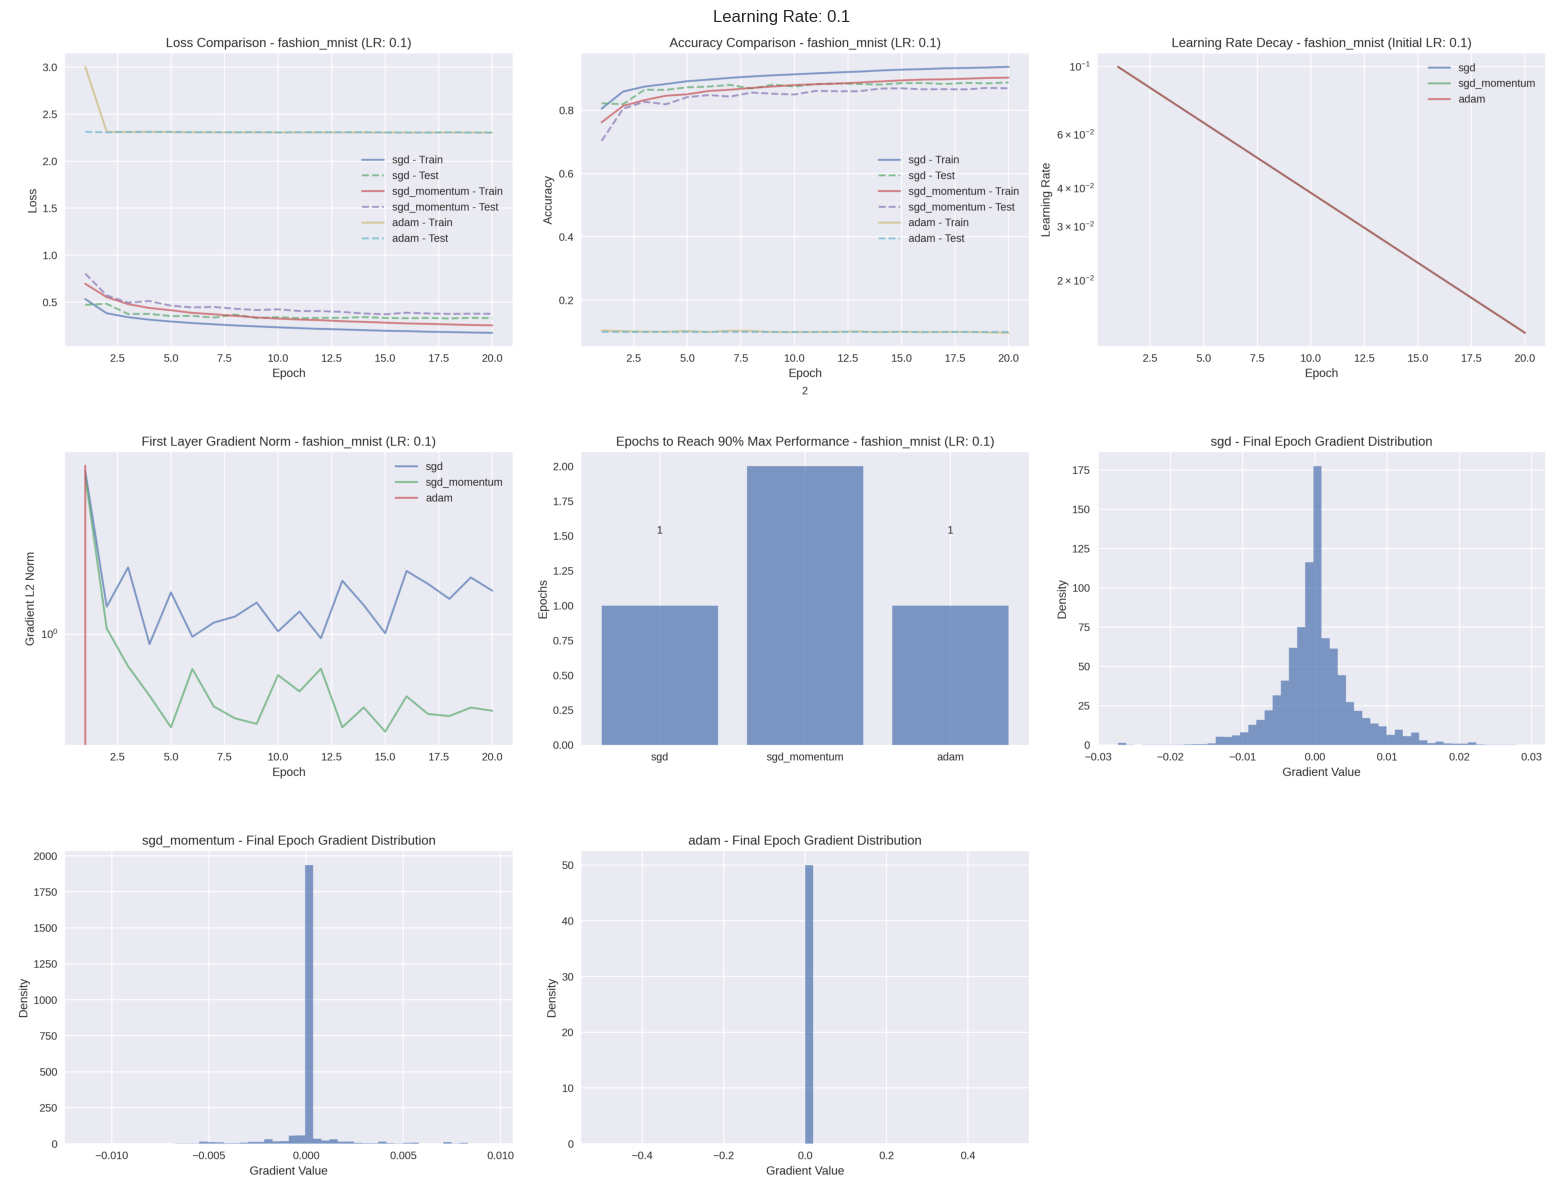

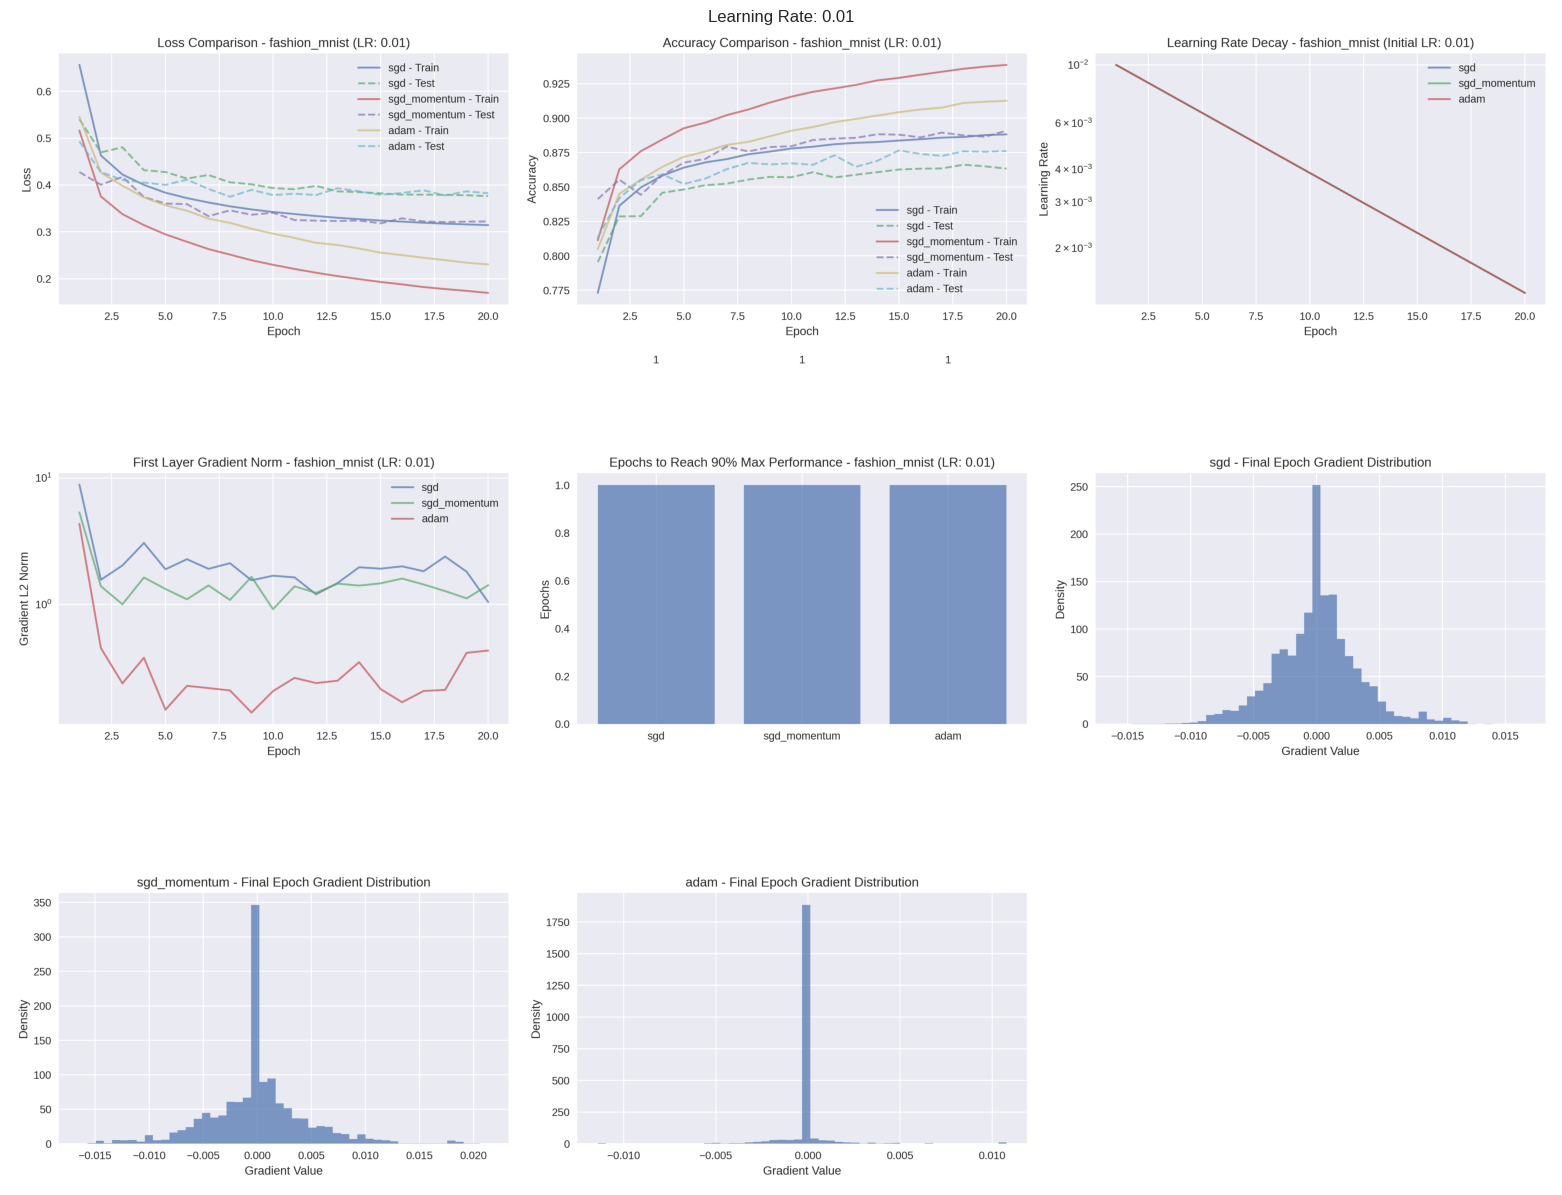

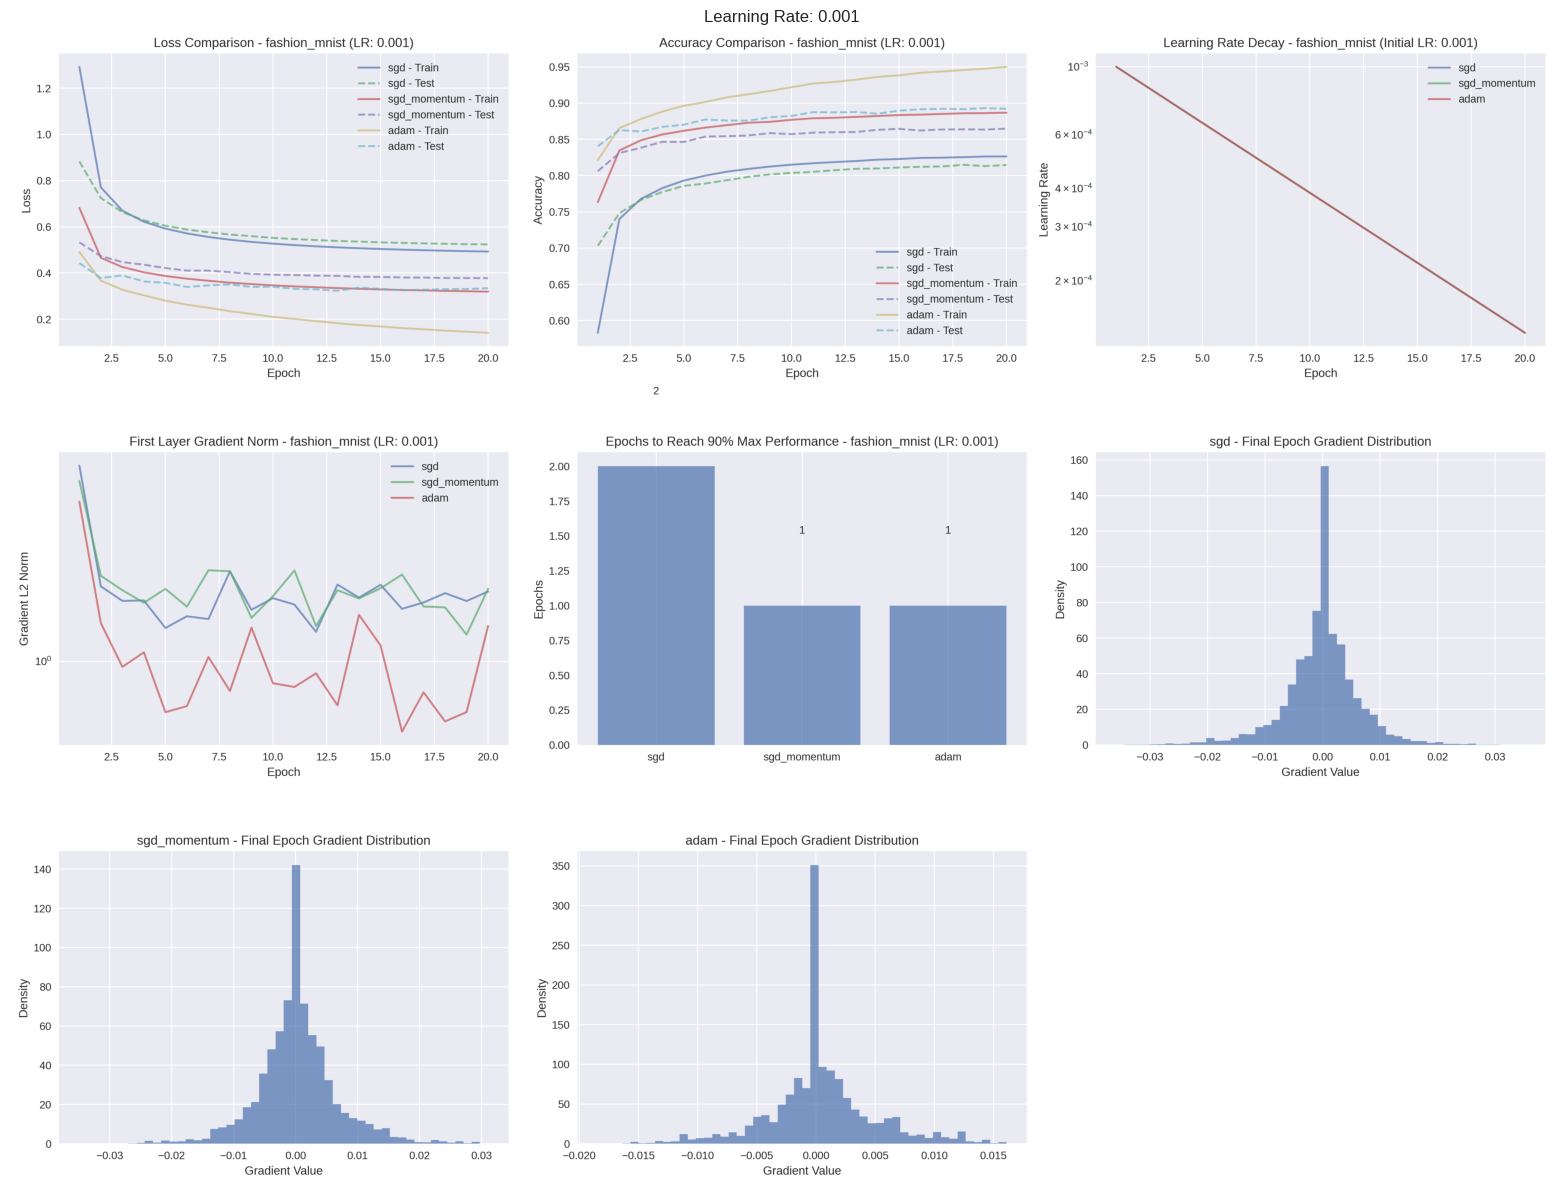

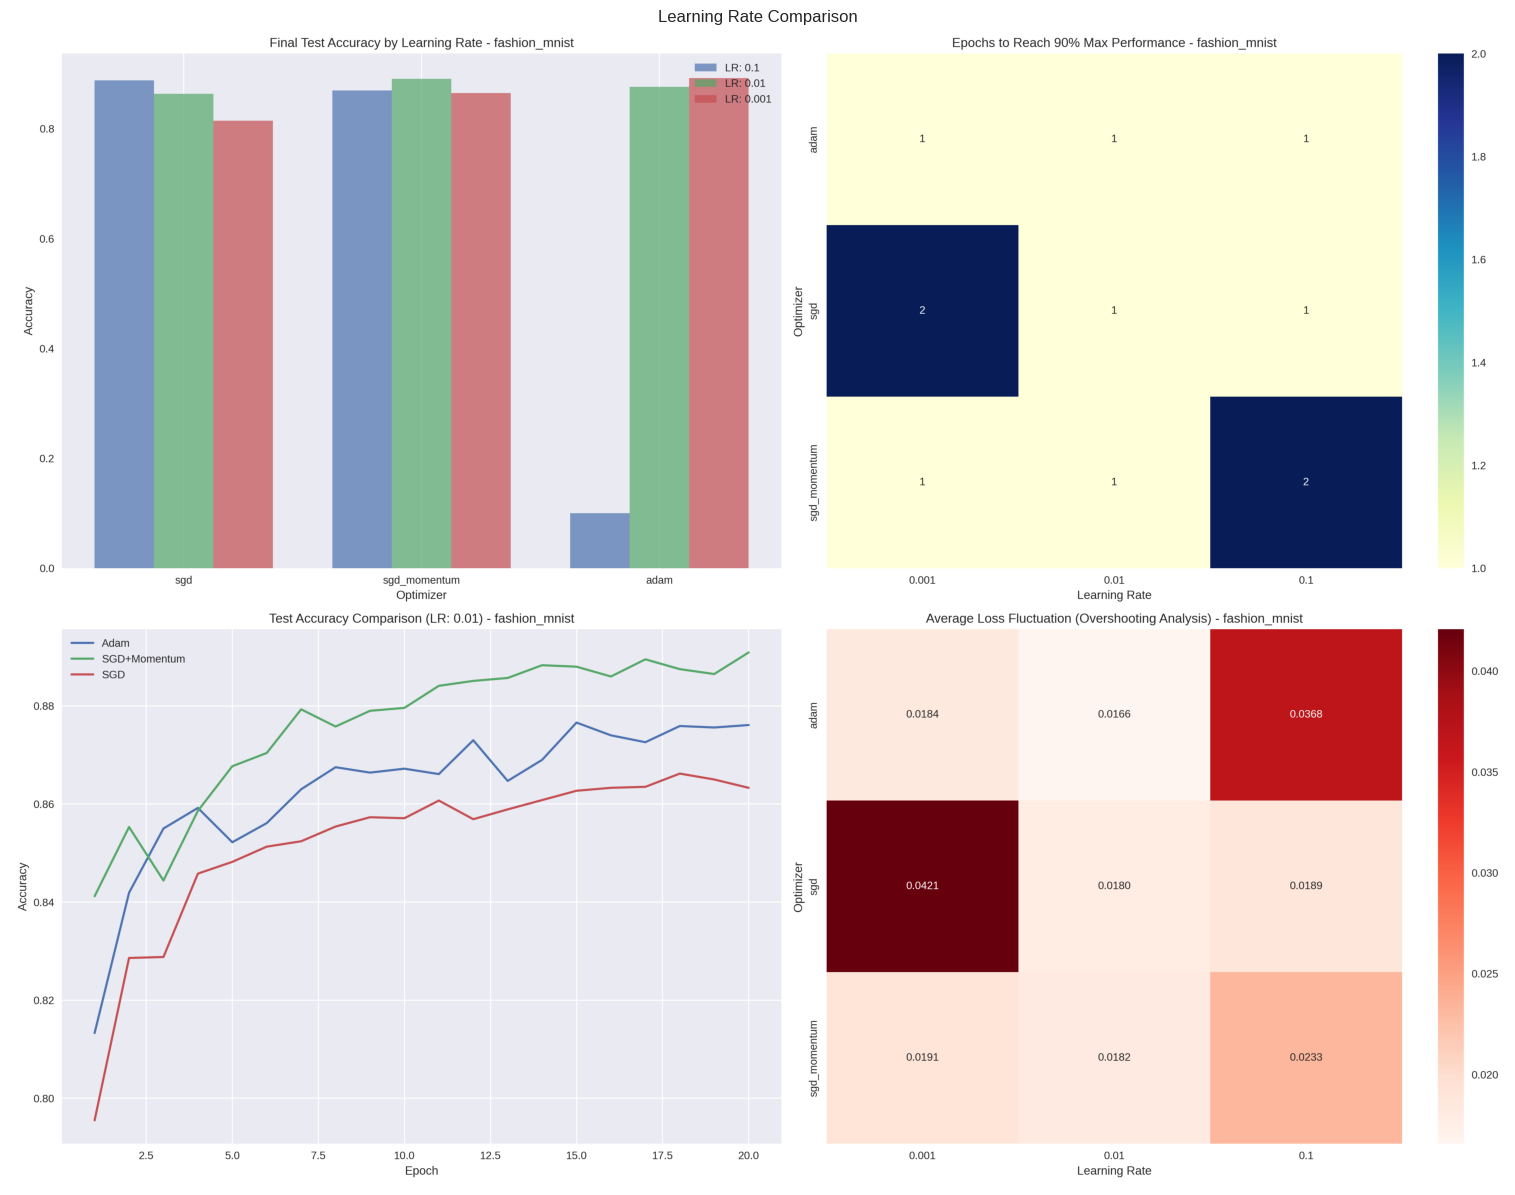

In [ ]:
# 저장된 이미지 파일 표시하기
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 각 학습률에 대한 결과 이미지 표시
for lr in [0.1, 0.01, 0.001]:
    img = mpimg.imread(f'results/optimizer_comparison_fashion_mnist_lr{lr}.png')
    plt.figure(figsize=(20, 15))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Learning Rate: {lr}')
    plt.show()

# 종합 비교 이미지 표시
img = mpimg.imread('results/learning_rate_comparison_fashion_mnist.png')
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.axis('off')
plt.title('Learning Rate Comparison')
plt.show()